## Overview dan Expected Output

Dalam project ini saya menggunakan dataset yang bernama autoinsurance_churn, dataset ini memiliki 1.68 juta rows dan 22 columns. Dalam project ini saya akan mencoba untuk memberikan insight bisnis dari kelompok customer mana yang memiliki revenue terbesar,  dan tujuan akhirnya memprediksi churn

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DS 23_Aditya Aji Nugroho_Progress Final Project (Drive)/autoinsurance_churn.csv')

In [ ]:
df

,individual_id,address_id,curr_ann_amt,days_tenure,cust_orig_date,age_in_years,date_of_birth,latitude,longitude,city,...,income,has_children,length_of_residence,marital_status,home_market_value,home_owner,college_degree,good_credit,acct_suspd_date,Churn
0,2.213000e+11,5.213000e+11,818.877997,1454.0,2018-12-09,44,1978-06-23,32.578829,-96.305006,Kaufman,...,22500.0,1.0,15.0,Married,50000 - 74999,1.0,1.0,1.0,NaN,0
1,2.213001e+11,5.213001e+11,974.199182,1795.0,2018-01-02,72,1950-05-30,32.732209,-97.000893,Grand Prairie,...,27500.0,0.0,2.0,Single,50000 - 74999,1.0,0.0,0.0,NaN,0
2,2.213007e+11,5.213002e+11,967.375112,4818.0,2009-09-23,55,1967-07-07,32.819777,-96.846938,Dallas,...,42500.0,0.0,10.0,Married,75000 - 99999,1.0,0.0,0.0,NaN,0
3,2.213016e+11,5.213006e+11,992.409561,130.0,2022-07-25,53,1969-05-25,32.684065,-97.162180,Arlington,...,125000.0,1.0,6.0,Married,175000 - 199999,1.0,0.0,1.0,2021-12-22,1
4,2.213016e+11,5.213006e+11,784.633494,5896.0,2006-10-11,50,1972-09-25,32.751398,-97.376745,Fort Worth,...,87500.0,1.0,4.0,Married,225000 - 249999,1.0,1.0,1.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1680904,2.213007e+11,5.213002e+11,1259.900413,803.0,2020-09-20,55,1967-07-07,32.678483,-96.665119,Dallas,...,27500.0,1.0,3.0,Single,50000 - 74999,1.0,0.0,1.0,NaN,0
1680905,2.213015e+11,5.213005e+11,604.096865,3261.0,2013-12-28,77,1945-07-01,32.972007,-96.688905,Richardson,...,87500.0,0.0,1.0,Married,125000 - 149999,1.0,0.0,1.0,NaN,0
1680906,2.213026e+11,5.213009e+11,1255.570597,3403.0,2013-08-08,41,1981-09-22,32.902815,-96.510684,Rowlett,...,125000.0,0.0,12.0,Married,125000 - 149999,1.0,1.0,1.0,NaN,0
1680907,2.213008e+11,5.213003e+11,1104.105051,1258.0,2019-06-23,52,1970-07-26,32.892940,-97.245317,Keller,...,87500.0,1.0,11.0,Single,75000 - 99999,1.0,1.0,1.0,NaN,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680909 entries, 0 to 1680908
Data columns (total 22 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   individual_id        1680909 non-null  float64
 1   address_id           1680909 non-null  float64
 2   curr_ann_amt         1680909 non-null  float64
 3   days_tenure          1680909 non-null  float64
 4   cust_orig_date       1680909 non-null  object 
 5   age_in_years         1680909 non-null  int64  
 6   date_of_birth        1680909 non-null  object 
 7   latitude             1427190 non-null  float64
 8   longitude            1427190 non-null  float64
 9   city                 1668842 non-null  object 
 10  state                1680909 non-null  object 
 11  county               1668842 non-null  object 
 12  income               1680909 non-null  float64
 13  has_children         1680909 non-null  float64
 14  length_of_residence  1680909 non-null  float64
 15

In [ ]:
data_missing_value = df.isna().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(df))*100,2)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

,feature,missing_value,percentage
0,acct_suspd_date,1487453,88.49
1,latitude,253719,15.09
2,longitude,253719,15.09
3,home_market_value,92286,5.49
4,county,12067,0.72
5,city,12067,0.72


In [ ]:
df.duplicated().sum()

0

In [ ]:
category = df.select_dtypes(include= ['object'])

In [ ]:
for i in category:
    print(f"Value counts of {i} column")
    print(df[i].value_counts(), '\n')

Value counts of cust_orig_date column
2005-09-11    495114
2022-09-13     14917
2019-08-16     14300
2022-06-24      8269
2020-12-09      7330
               ...  
2014-04-05         1
2015-01-08         1
2006-04-02         1
2010-03-17         1
2021-02-12         1
Name: cust_orig_date, Length: 5244, dtype: int64 

Value counts of date_of_birth column
1967-07-07    142238
1970-07-26      3814
1967-06-27      3803
1968-06-26      3778
1970-06-25      3769
               ...  
1909-07-10         1
1912-02-08         1
1910-07-10         1
1911-04-10         1
1910-10-10         1
Name: date_of_birth, Length: 1085, dtype: int64 

Value counts of city column
Dallas                   305939
Fort Worth               219452
Arlington                 98787
Plano                     83855
Garland                   61933
                          ...  
Era                         159
Forreston                   132
Chatfield                    95
Mertens                      71
Naval Air Stat

In [ ]:
Nums = df.select_dtypes(include=['int64', 'float64'])



In [ ]:
for i in Nums:
    print(f"Value counts of {i} column")
    print(df[i].value_counts(), '\n')

Value counts of individual_id column
2.213000e+11    1
2.213004e+11    1
2.213027e+11    1
2.213000e+11    1
2.213002e+11    1
               ..
2.213026e+11    1
2.213025e+11    1
2.213020e+11    1
2.213032e+11    1
2.213016e+11    1
Name: individual_id, Length: 1680909, dtype: int64 

Value counts of address_id column
5.213006e+11    340
5.213005e+11    301
5.213006e+11    226
5.213007e+11    224
5.213006e+11    196
               ... 
5.213011e+11      1
5.213010e+11      1
5.213005e+11      1
5.213002e+11      1
5.213006e+11      1
Name: address_id, Length: 1296697, dtype: int64 

Value counts of curr_ann_amt column
1017.356084    2
1072.996627    2
915.843047     2
1002.713955    2
1046.199330    2
              ..
921.264279     1
934.133745     1
636.761785     1
1249.894903    1
829.869558     1
Name: curr_ann_amt, Length: 1679315, dtype: int64 

Value counts of days_tenure column
6291.0    495114
80.0       14917
1204.0     14300
161.0       8269
723.0       7330
           ..

## Suspend Analysis

In [ ]:
df[df['acct_suspd_date'].isna()]

,individual_id,address_id,curr_ann_amt,days_tenure,cust_orig_date,age_in_years,date_of_birth,latitude,longitude,city,...,income,has_children,length_of_residence,marital_status,home_market_value,home_owner,college_degree,good_credit,acct_suspd_date,Churn
0,2.213000e+11,5.213000e+11,818.877997,1454.0,2018-12-09,44,1978-06-23,32.578829,-96.305006,Kaufman,...,22500.0,1.0,15.0,Married,50000 - 74999,1.0,1.0,1.0,NaN,0
1,2.213001e+11,5.213001e+11,974.199182,1795.0,2018-01-02,72,1950-05-30,32.732209,-97.000893,Grand Prairie,...,27500.0,0.0,2.0,Single,50000 - 74999,1.0,0.0,0.0,NaN,0
2,2.213007e+11,5.213002e+11,967.375112,4818.0,2009-09-23,55,1967-07-07,32.819777,-96.846938,Dallas,...,42500.0,0.0,10.0,Married,75000 - 99999,1.0,0.0,0.0,NaN,0
4,2.213016e+11,5.213006e+11,784.633494,5896.0,2006-10-11,50,1972-09-25,32.751398,-97.376745,Fort Worth,...,87500.0,1.0,4.0,Married,225000 - 249999,1.0,1.0,1.0,NaN,0
5,2.213027e+11,5.213010e+11,909.916163,484.0,2021-08-05,33,1990-04-20,NaN,NaN,Dallas,...,52500.0,0.0,2.0,Married,125000 - 149999,1.0,0.0,1.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1680904,2.213007e+11,5.213002e+11,1259.900413,803.0,2020-09-20,55,1967-07-07,32.678483,-96.665119,Dallas,...,27500.0,1.0,3.0,Single,50000 - 74999,1.0,0.0,1.0,NaN,0
1680905,2.213015e+11,5.213005e+11,604.096865,3261.0,2013-12-28,77,1945-07-01,32.972007,-96.688905,Richardson,...,87500.0,0.0,1.0,Married,125000 - 149999,1.0,0.0,1.0,NaN,0
1680906,2.213026e+11,5.213009e+11,1255.570597,3403.0,2013-08-08,41,1981-09-22,32.902815,-96.510684,Rowlett,...,125000.0,0.0,12.0,Married,125000 - 149999,1.0,1.0,1.0,NaN,0
1680907,2.213008e+11,5.213003e+11,1104.105051,1258.0,2019-06-23,52,1970-07-26,32.892940,-97.245317,Keller,...,87500.0,1.0,11.0,Single,75000 - 99999,1.0,1.0,1.0,NaN,0


In [ ]:
df [['acct_suspd_date', 'Churn']]

,acct_suspd_date,Churn
0,NaN,0
1,NaN,0
2,NaN,0
3,2021-12-22,1
4,NaN,0
...,...,...
1680904,NaN,0
1680905,NaN,0
1680906,NaN,0
1680907,NaN,0


In [ ]:
suspend_analysis = df[(df['Churn'] == 1) & (df['acct_suspd_date'].isna())]

suspend_analysis[['acct_suspd_date', 'Churn']]

,acct_suspd_date,Churn


In [ ]:
df['acct_suspd_date'].replace(np.nan, 0, inplace=True)

In [ ]:
df = df.drop(columns = ['acct_suspd_date'])

Since the value of acct_suspd_date is highly correlated with Churn value, it will make the column redundant thus it will be drop.

## Longtitude and Langtitude analysis


In [ ]:
df[['address_id', 'latitude', 'longitude', 'home_market_value' ]]

,address_id,latitude,longitude,home_market_value
0,5.213000e+11,32.578829,-96.305006,50000 - 74999
1,5.213001e+11,32.732209,-97.000893,50000 - 74999
2,5.213002e+11,32.819777,-96.846938,75000 - 99999
3,5.213006e+11,32.684065,-97.162180,175000 - 199999
4,5.213006e+11,32.751398,-97.376745,225000 - 249999
...,...,...,...,...
1680904,5.213002e+11,32.678483,-96.665119,50000 - 74999
1680905,5.213005e+11,32.972007,-96.688905,125000 - 149999
1680906,5.213009e+11,32.902815,-96.510684,125000 - 149999
1680907,5.213003e+11,32.892940,-97.245317,75000 - 99999


In [ ]:
df[(df['latitude'].isna()) | (df['longitude'].isna())]

,individual_id,address_id,curr_ann_amt,days_tenure,cust_orig_date,age_in_years,date_of_birth,latitude,longitude,city,...,county,income,has_children,length_of_residence,marital_status,home_market_value,home_owner,college_degree,good_credit,Churn
5,2.213027e+11,5.213010e+11,909.916163,484.0,2021-08-05,33,1990-04-20,NaN,NaN,Dallas,...,Dallas,52500.000,0.0,2.0,Married,125000 - 149999,1.0,0.0,1.0,0
20,2.213000e+11,5.213000e+11,716.719703,5654.0,2007-06-10,49,1974-01-22,NaN,NaN,Fort Worth,...,Tarrant,87500.000,1.0,0.0,Single,NaN,0.0,0.0,0.0,1
21,2.213015e+11,5.213006e+11,1322.512360,6291.0,2005-09-11,55,1967-10-27,NaN,NaN,Garland,...,Dallas,37500.000,1.0,7.0,Single,100000 - 124999,1.0,1.0,1.0,0
29,2.213003e+11,5.213001e+11,963.595559,6291.0,2005-09-11,72,1950-10-30,NaN,NaN,Dallas,...,Dallas,47500.000,0.0,10.0,Single,50000 - 74999,1.0,0.0,1.0,0
36,2.213027e+11,5.213010e+11,1003.887697,6291.0,2005-09-11,50,1973-04-24,NaN,NaN,Frisco,...,Collin,87500.000,0.0,2.0,Single,250000 - 274999,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1680866,2.213002e+11,5.213001e+11,1623.114930,6291.0,2005-09-11,46,1977-04-23,NaN,NaN,Hurst,...,Tarrant,37500.000,1.0,0.0,Single,NaN,0.0,1.0,1.0,0
1680867,2.213024e+11,5.213009e+11,1023.396098,1076.0,2019-12-22,37,1985-05-21,NaN,NaN,Dallas,...,Dallas,80372.176,1.0,15.0,Married,1000 - 24999,1.0,0.0,1.0,0
1680868,2.213006e+11,5.213002e+11,854.955680,4595.0,2010-05-04,49,1973-07-25,NaN,NaN,Mansfield,...,Tarrant,62500.000,0.0,3.0,Married,1000 - 24999,0.0,0.0,0.0,0
1680874,2.213007e+11,5.213003e+11,708.522841,586.0,2021-04-25,34,1988-12-21,NaN,NaN,Dallas,...,Dallas,57500.000,0.0,2.0,Single,300000 - 349999,0.0,0.0,0.0,0


In [ ]:
df = df.drop(columns = ['address_id', 'latitude', 'longitude'])

In [ ]:
df

,individual_id,curr_ann_amt,days_tenure,cust_orig_date,age_in_years,date_of_birth,city,state,county,income,has_children,length_of_residence,marital_status,home_market_value,home_owner,college_degree,good_credit,Churn
0,2.213000e+11,818.877997,1454.0,2018-12-09,44,1978-06-23,Kaufman,TX,Kaufman,22500.0,1.0,15.0,Married,50000 - 74999,1.0,1.0,1.0,0
1,2.213001e+11,974.199182,1795.0,2018-01-02,72,1950-05-30,Grand Prairie,TX,Dallas,27500.0,0.0,2.0,Single,50000 - 74999,1.0,0.0,0.0,0
2,2.213007e+11,967.375112,4818.0,2009-09-23,55,1967-07-07,Dallas,TX,Dallas,42500.0,0.0,10.0,Married,75000 - 99999,1.0,0.0,0.0,0
3,2.213016e+11,992.409561,130.0,2022-07-25,53,1969-05-25,Arlington,TX,Tarrant,125000.0,1.0,6.0,Married,175000 - 199999,1.0,0.0,1.0,1
4,2.213016e+11,784.633494,5896.0,2006-10-11,50,1972-09-25,Fort Worth,TX,Tarrant,87500.0,1.0,4.0,Married,225000 - 249999,1.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1680904,2.213007e+11,1259.900413,803.0,2020-09-20,55,1967-07-07,Dallas,TX,Dallas,27500.0,1.0,3.0,Single,50000 - 74999,1.0,0.0,1.0,0
1680905,2.213015e+11,604.096865,3261.0,2013-12-28,77,1945-07-01,Richardson,TX,Dallas,87500.0,0.0,1.0,Married,125000 - 149999,1.0,0.0,1.0,0
1680906,2.213026e+11,1255.570597,3403.0,2013-08-08,41,1981-09-22,Rowlett,TX,Dallas,125000.0,0.0,12.0,Married,125000 - 149999,1.0,1.0,1.0,0
1680907,2.213008e+11,1104.105051,1258.0,2019-06-23,52,1970-07-26,Keller,TX,Tarrant,87500.0,1.0,11.0,Single,75000 - 99999,1.0,1.0,1.0,0


Since adress_id is a unique ID given for address and longitude and latitude is only a coordinate for the address it doesn't contribute for the further analysis thus these columns will be drop.

## home market analysis

In [ ]:
df[df['home_market_value'].isna()]

,individual_id,curr_ann_amt,days_tenure,cust_orig_date,age_in_years,date_of_birth,city,state,county,income,has_children,length_of_residence,marital_status,home_market_value,home_owner,college_degree,good_credit,Churn
20,2.213000e+11,716.719703,5654.0,2007-06-10,49,1974-01-22,Fort Worth,TX,Tarrant,87500.000,1.0,0.0,Single,NaN,0.0,0.0,0.0,1
47,2.213012e+11,1162.849677,4829.0,2009-09-12,42,1980-12-23,Dallas,TX,Dallas,37500.000,1.0,6.0,Married,NaN,1.0,1.0,1.0,0
54,2.213033e+11,655.653460,1960.0,2017-07-21,39,1983-07-24,NaN,TX,NaN,47500.000,1.0,0.0,Married,NaN,0.0,1.0,1.0,1
74,2.213014e+11,737.988760,1204.0,2019-08-16,55,1967-07-07,Arlington,TX,Tarrant,125000.000,0.0,0.0,Single,NaN,0.0,0.0,1.0,0
78,2.213023e+11,803.960621,2008.0,2017-06-03,55,1967-07-07,Plano,TX,Collin,80372.176,0.0,0.0,Single,NaN,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1680833,2.213020e+11,886.566699,6291.0,2005-09-11,66,1957-04-28,Fort Worth,TX,Tarrant,70000.000,0.0,0.0,Married,NaN,0.0,0.0,1.0,0
1680842,2.213012e+11,686.475818,2735.0,2015-06-07,43,1980-01-22,Dallas,TX,Dallas,87500.000,1.0,0.0,Married,NaN,0.0,1.0,1.0,0
1680846,2.213025e+11,776.978996,2594.0,2015-10-26,38,1984-09-22,Dallas,TX,Dallas,52500.000,1.0,0.0,Married,NaN,0.0,1.0,1.0,0
1680851,2.213029e+11,1080.791055,3316.0,2013-11-03,78,1944-07-02,Azle,TX,Tarrant,42500.000,0.0,0.0,Married,NaN,0.0,1.0,1.0,0


In [ ]:
df = df[~df['home_market_value'].isna()]

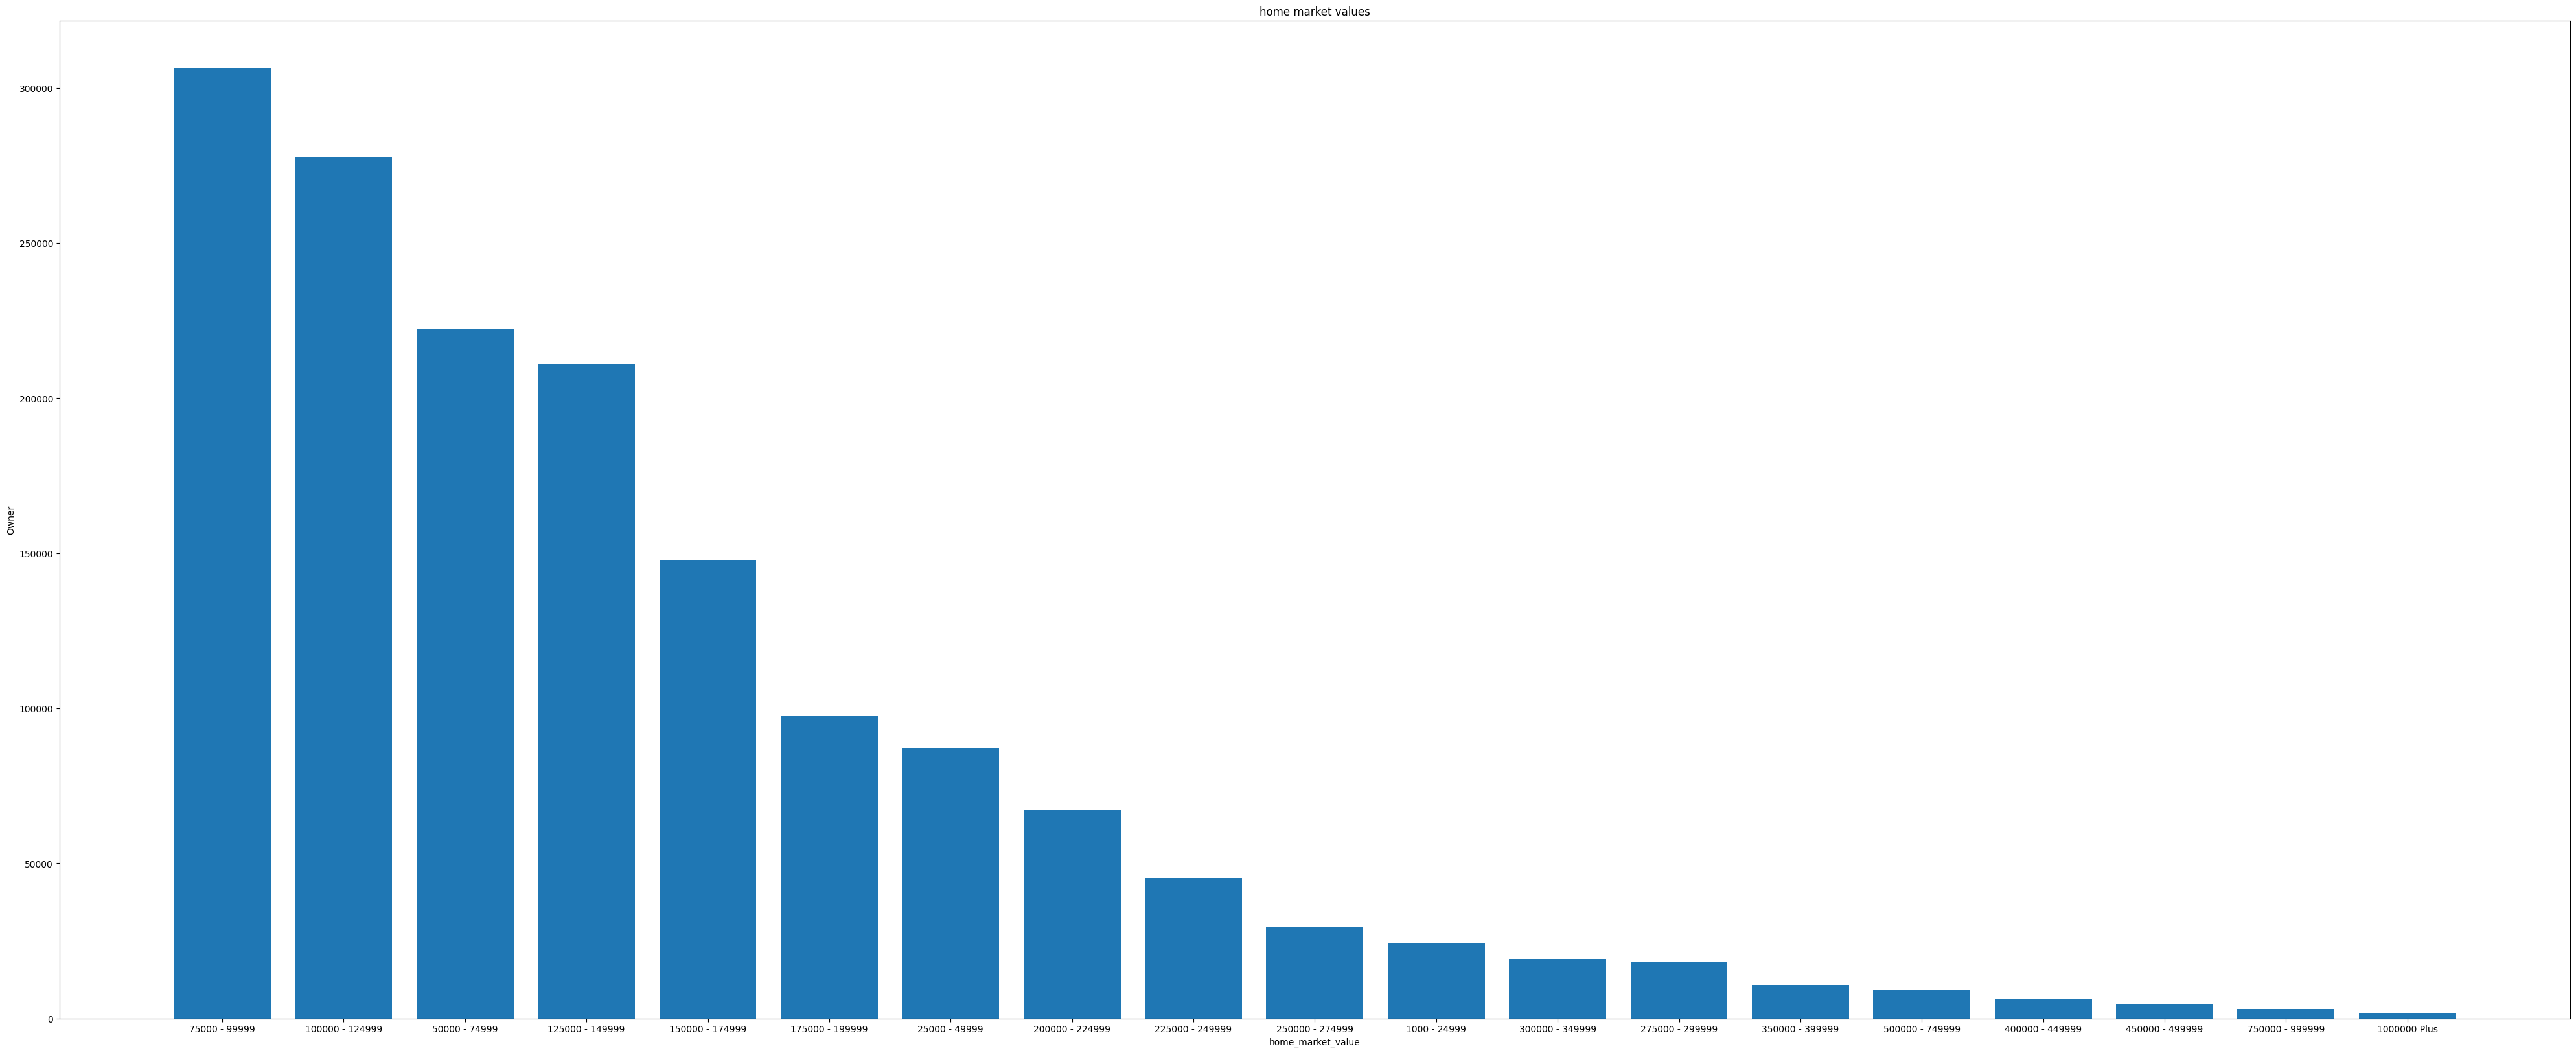

In [ ]:
home_count = df['home_market_value'].value_counts()

fig, ax = plt.subplots(figsize=(50,20))
plt.bar(home_count.index, home_count.values)

plt.xlabel('home_market_value')
plt.ylabel('Owner')
plt.title('home market values')
plt.show()

In [ ]:
home_analysis = df.groupby('home_market_value').agg(
total_customer = ('individual_id', 'count'),
home_ownership = ('home_owner', 'sum'),
resident_lenght = ('length_of_residence', 'mean'),
status = ('marital_status', lambda x: x.mode().iloc[0] if not x.mode().empty else None),
cust_income = ('income', lambda x: x.mode().iloc[0] if not x.mode().empty else None)).reset_index()

In [ ]:
home_analysis

,home_market_value,total_customer,home_ownership,resident_lenght,status,cust_income
0,1000 - 24999,24463,17167.0,6.921530,Single,87500.0
1,100000 - 124999,277533,245016.0,7.979538,Married,87500.0
2,1000000 Plus,1858,1384.0,6.151495,Married,250000.0
3,125000 - 149999,211090,184802.0,7.659099,Married,87500.0
4,150000 - 174999,147886,127585.0,7.313861,Married,125000.0
5,175000 - 199999,97586,83900.0,6.978944,Married,125000.0
6,200000 - 224999,67148,56804.0,6.751395,Married,125000.0
7,225000 - 249999,45217,37527.0,6.565319,Married,125000.0
8,25000 - 49999,87136,74629.0,9.066756,Married,32500.0
9,250000 - 274999,29390,22838.0,6.347559,Married,125000.0


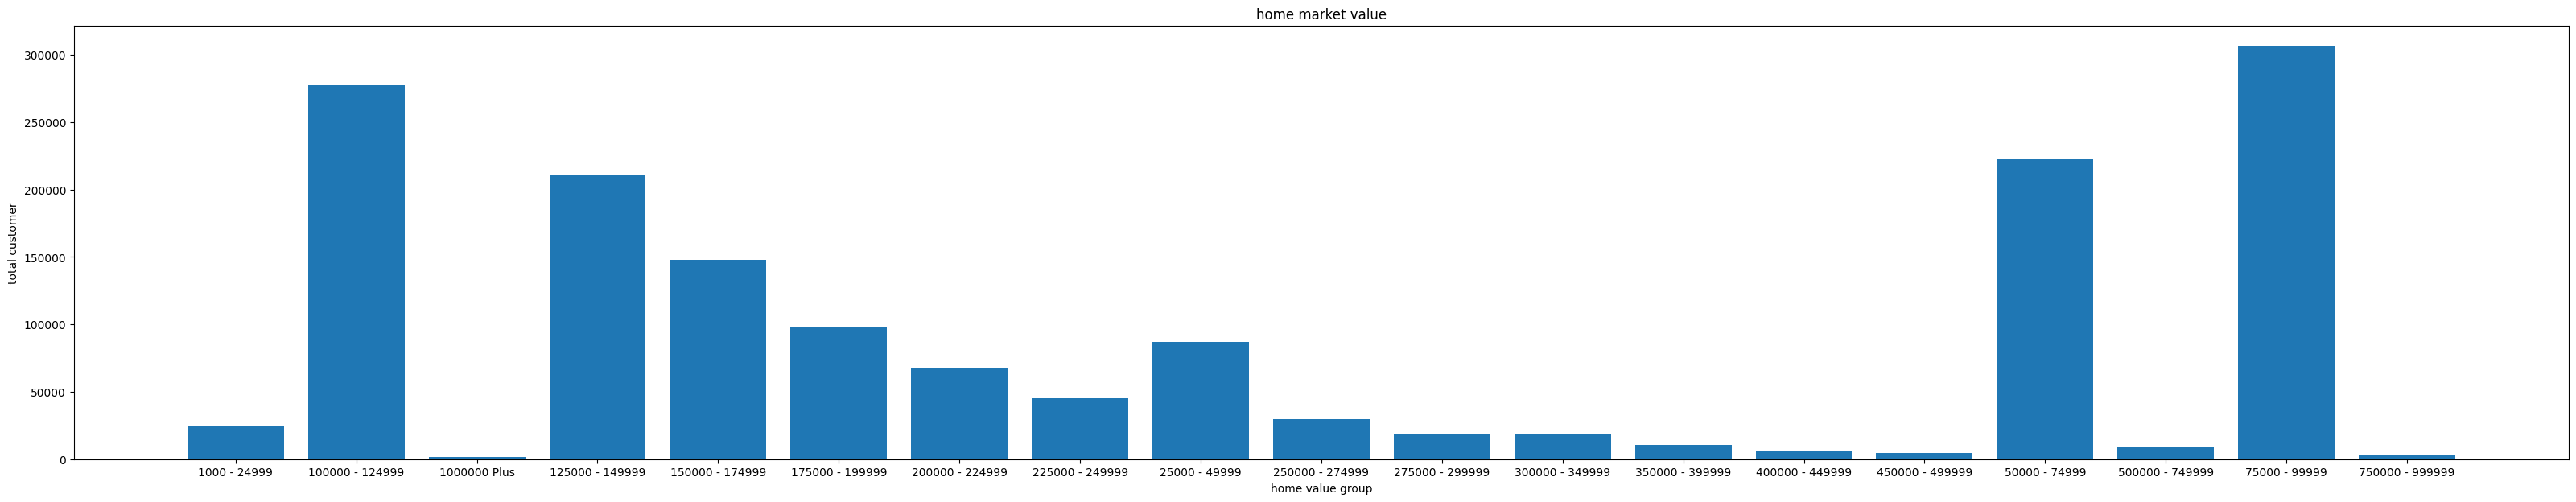

In [ ]:
fig, ax = plt.subplots(figsize=(40,7))
plt.bar(home_analysis['home_market_value'], home_analysis['total_customer'])

plt.xlabel('home value group')
plt.ylabel('total customer')
plt.title('home market value')
plt.show()

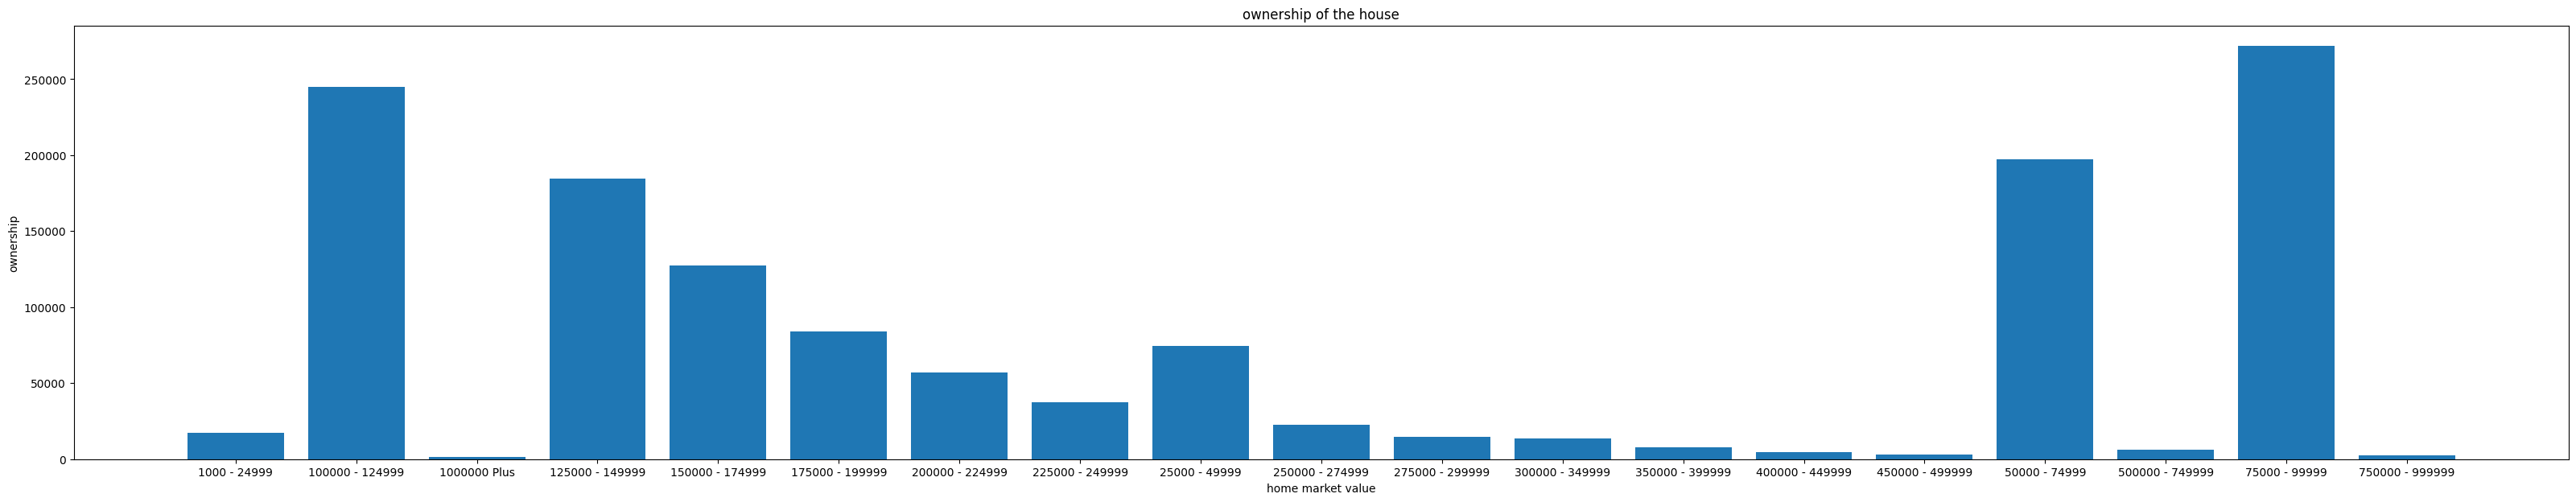

In [ ]:
fig, ax = plt.subplots(figsize=(40,7))
plt.bar(home_analysis['home_market_value'], home_analysis['home_ownership'])

plt.xlabel('home market value')
plt.ylabel('ownership')
plt.title('ownership of the house')
plt.show()

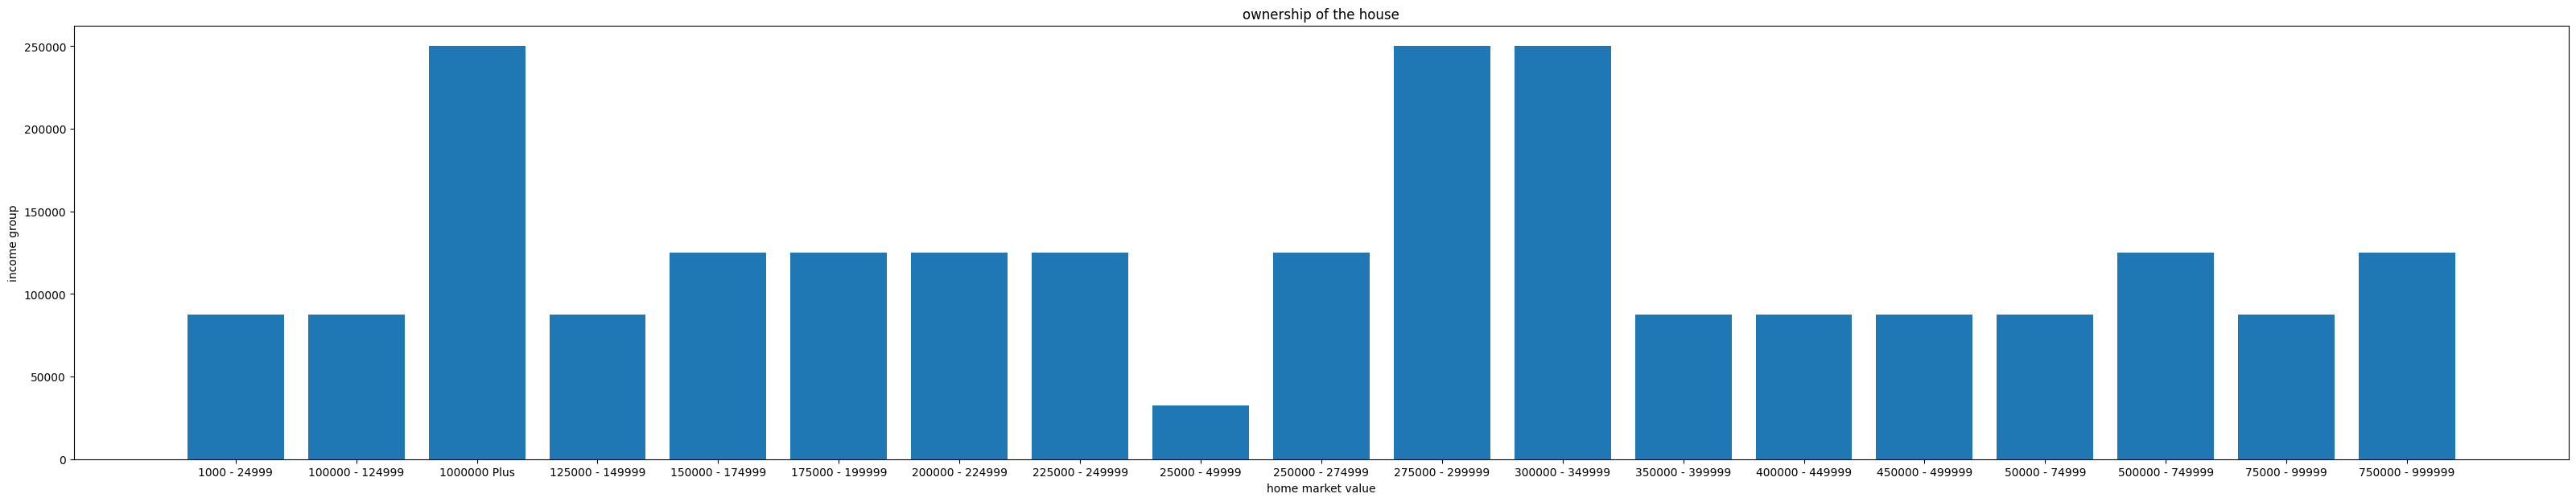

In [ ]:
fig, ax = plt.subplots(figsize=(40,7))
plt.bar(home_analysis['home_market_value'], home_analysis['cust_income'])

plt.xlabel('home market value')
plt.ylabel('income group')
plt.title('ownership of the house')
plt.show()

In [ ]:
home_analysis['cust_income'].mode()

0    87500.0
Name: cust_income, dtype: float64

In [ ]:
df['home_market_value'].replace('1000000 Plus', '1000000 - 1024999', inplace=True)

In [ ]:
df[['minimum_house_value', 'maximum_house_value']] = df['home_market_value'].str.split(' - ', expand=True).astype(int)

In [ ]:
df

,individual_id,curr_ann_amt,days_tenure,cust_orig_date,age_in_years,date_of_birth,city,state,county,income,has_children,length_of_residence,marital_status,home_market_value,home_owner,college_degree,good_credit,Churn,minimum_house_value,maximum_house_value
0,2.213000e+11,818.877997,1454.0,2018-12-09,44,1978-06-23,Kaufman,TX,Kaufman,22500.0,1.0,15.0,Married,50000 - 74999,1.0,1.0,1.0,0,50000,74999
1,2.213001e+11,974.199182,1795.0,2018-01-02,72,1950-05-30,Grand Prairie,TX,Dallas,27500.0,0.0,2.0,Single,50000 - 74999,1.0,0.0,0.0,0,50000,74999
2,2.213007e+11,967.375112,4818.0,2009-09-23,55,1967-07-07,Dallas,TX,Dallas,42500.0,0.0,10.0,Married,75000 - 99999,1.0,0.0,0.0,0,75000,99999
3,2.213016e+11,992.409561,130.0,2022-07-25,53,1969-05-25,Arlington,TX,Tarrant,125000.0,1.0,6.0,Married,175000 - 199999,1.0,0.0,1.0,1,175000,199999
4,2.213016e+11,784.633494,5896.0,2006-10-11,50,1972-09-25,Fort Worth,TX,Tarrant,87500.0,1.0,4.0,Married,225000 - 249999,1.0,1.0,1.0,0,225000,249999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1680904,2.213007e+11,1259.900413,803.0,2020-09-20,55,1967-07-07,Dallas,TX,Dallas,27500.0,1.0,3.0,Single,50000 - 74999,1.0,0.0,1.0,0,50000,74999
1680905,2.213015e+11,604.096865,3261.0,2013-12-28,77,1945-07-01,Richardson,TX,Dallas,87500.0,0.0,1.0,Married,125000 - 149999,1.0,0.0,1.0,0,125000,149999
1680906,2.213026e+11,1255.570597,3403.0,2013-08-08,41,1981-09-22,Rowlett,TX,Dallas,125000.0,0.0,12.0,Married,125000 - 149999,1.0,1.0,1.0,0,125000,149999
1680907,2.213008e+11,1104.105051,1258.0,2019-06-23,52,1970-07-26,Keller,TX,Tarrant,87500.0,1.0,11.0,Single,75000 - 99999,1.0,1.0,1.0,0,75000,99999


In [ ]:
df = df.drop(columns = ['home_market_value'])

In [ ]:
df

,individual_id,curr_ann_amt,days_tenure,cust_orig_date,age_in_years,date_of_birth,city,state,county,income,has_children,length_of_residence,marital_status,home_owner,college_degree,good_credit,Churn,minimum_house_value,maximum_house_value
0,2.213000e+11,818.877997,1454.0,2018-12-09,44,1978-06-23,Kaufman,TX,Kaufman,22500.0,1.0,15.0,Married,1.0,1.0,1.0,0,50000,74999
1,2.213001e+11,974.199182,1795.0,2018-01-02,72,1950-05-30,Grand Prairie,TX,Dallas,27500.0,0.0,2.0,Single,1.0,0.0,0.0,0,50000,74999
2,2.213007e+11,967.375112,4818.0,2009-09-23,55,1967-07-07,Dallas,TX,Dallas,42500.0,0.0,10.0,Married,1.0,0.0,0.0,0,75000,99999
3,2.213016e+11,992.409561,130.0,2022-07-25,53,1969-05-25,Arlington,TX,Tarrant,125000.0,1.0,6.0,Married,1.0,0.0,1.0,1,175000,199999
4,2.213016e+11,784.633494,5896.0,2006-10-11,50,1972-09-25,Fort Worth,TX,Tarrant,87500.0,1.0,4.0,Married,1.0,1.0,1.0,0,225000,249999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1680904,2.213007e+11,1259.900413,803.0,2020-09-20,55,1967-07-07,Dallas,TX,Dallas,27500.0,1.0,3.0,Single,1.0,0.0,1.0,0,50000,74999
1680905,2.213015e+11,604.096865,3261.0,2013-12-28,77,1945-07-01,Richardson,TX,Dallas,87500.0,0.0,1.0,Married,1.0,0.0,1.0,0,125000,149999
1680906,2.213026e+11,1255.570597,3403.0,2013-08-08,41,1981-09-22,Rowlett,TX,Dallas,125000.0,0.0,12.0,Married,1.0,1.0,1.0,0,125000,149999
1680907,2.213008e+11,1104.105051,1258.0,2019-06-23,52,1970-07-26,Keller,TX,Tarrant,87500.0,1.0,11.0,Single,1.0,1.0,1.0,0,75000,99999


In [ ]:


df['median_house_value'] = (df['minimum_house_value'] + df['maximum_house_value'])/2

In [ ]:
df[['minimum_house_value', 'maximum_house_value', 'median_house_value']]

,minimum_house_value,maximum_house_value,median_house_value
0,50000,74999,62499.5
1,50000,74999,62499.5
2,75000,99999,87499.5
3,175000,199999,187499.5
4,225000,249999,237499.5
...,...,...,...
1680904,50000,74999,62499.5
1680905,125000,149999,137499.5
1680906,125000,149999,137499.5
1680907,75000,99999,87499.5


In [ ]:
df

,individual_id,curr_ann_amt,days_tenure,cust_orig_date,age_in_years,date_of_birth,city,state,county,income,has_children,length_of_residence,marital_status,home_owner,college_degree,good_credit,Churn,minimum_house_value,maximum_house_value,median_house_value
0,2.213000e+11,818.877997,1454.0,2018-12-09,44,1978-06-23,Kaufman,TX,Kaufman,22500.0,1.0,15.0,Married,1.0,1.0,1.0,0,50000,74999,62499.5
1,2.213001e+11,974.199182,1795.0,2018-01-02,72,1950-05-30,Grand Prairie,TX,Dallas,27500.0,0.0,2.0,Single,1.0,0.0,0.0,0,50000,74999,62499.5
2,2.213007e+11,967.375112,4818.0,2009-09-23,55,1967-07-07,Dallas,TX,Dallas,42500.0,0.0,10.0,Married,1.0,0.0,0.0,0,75000,99999,87499.5
3,2.213016e+11,992.409561,130.0,2022-07-25,53,1969-05-25,Arlington,TX,Tarrant,125000.0,1.0,6.0,Married,1.0,0.0,1.0,1,175000,199999,187499.5
4,2.213016e+11,784.633494,5896.0,2006-10-11,50,1972-09-25,Fort Worth,TX,Tarrant,87500.0,1.0,4.0,Married,1.0,1.0,1.0,0,225000,249999,237499.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1680904,2.213007e+11,1259.900413,803.0,2020-09-20,55,1967-07-07,Dallas,TX,Dallas,27500.0,1.0,3.0,Single,1.0,0.0,1.0,0,50000,74999,62499.5
1680905,2.213015e+11,604.096865,3261.0,2013-12-28,77,1945-07-01,Richardson,TX,Dallas,87500.0,0.0,1.0,Married,1.0,0.0,1.0,0,125000,149999,137499.5
1680906,2.213026e+11,1255.570597,3403.0,2013-08-08,41,1981-09-22,Rowlett,TX,Dallas,125000.0,0.0,12.0,Married,1.0,1.0,1.0,0,125000,149999,137499.5
1680907,2.213008e+11,1104.105051,1258.0,2019-06-23,52,1970-07-26,Keller,TX,Tarrant,87500.0,1.0,11.0,Single,1.0,1.0,1.0,0,75000,99999,87499.5


In [ ]:
df = df.drop(columns = ['minimum_house_value', 'maximum_house_value'])

## City, County and state analysis

In [ ]:
df[['city', 'county', 'state']]

,city,county,state
0,Kaufman,Kaufman,TX
1,Grand Prairie,Dallas,TX
2,Dallas,Dallas,TX
3,Arlington,Tarrant,TX
4,Fort Worth,Tarrant,TX
...,...,...,...
1680904,Dallas,Dallas,TX
1680905,Richardson,Dallas,TX
1680906,Rowlett,Dallas,TX
1680907,Keller,Tarrant,TX


In [ ]:
df[(df['city'].isna()) | (df['county'].isna())]

,individual_id,curr_ann_amt,days_tenure,cust_orig_date,age_in_years,date_of_birth,city,state,county,income,has_children,length_of_residence,marital_status,home_owner,college_degree,good_credit,Churn,median_house_value
204,2.213028e+11,1038.839760,6291.0,2005-09-11,47,1975-09-25,NaN,TX,NaN,5000.0,1.0,4.000,Married,1.0,0.0,1.0,0,12999.5
298,2.213028e+11,738.078569,2704.0,2015-07-08,67,1955-08-30,NaN,TX,NaN,5000.0,0.0,4.000,Married,0.0,1.0,0.0,0,162499.5
683,2.213033e+11,946.938854,176.0,2022-06-09,42,1980-11-23,NaN,TX,NaN,5000.0,1.0,3.000,Single,0.0,0.0,0.0,0,162499.5
1236,2.213028e+11,449.164585,2047.0,2017-04-25,55,1967-08-27,NaN,TX,NaN,17500.0,1.0,15.000,Single,1.0,1.0,0.0,0,137499.5
1311,2.213033e+11,920.461005,4732.0,2009-12-18,47,1976-03-24,NaN,TX,NaN,62500.0,1.0,6.801,Single,0.0,0.0,0.0,0,162499.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1680370,2.213033e+11,1112.759557,5095.0,2008-12-20,53,1970-02-23,NaN,TX,NaN,17500.0,1.0,7.000,Single,0.0,0.0,0.0,0,137499.5
1680378,2.213033e+11,496.213987,108.0,2022-08-16,47,1975-06-25,NaN,TX,NaN,22500.0,0.0,8.000,Single,0.0,0.0,0.0,1,87499.5
1680421,2.213033e+11,862.352977,1308.0,2019-05-04,58,1965-03-26,NaN,TX,NaN,5000.0,0.0,11.000,Single,1.0,0.0,0.0,0,162499.5
1680603,2.213028e+11,752.367760,6212.0,2005-11-29,74,1948-05-01,NaN,TX,NaN,37500.0,0.0,2.000,Married,1.0,0.0,1.0,0,137499.5


In [ ]:
city_analysis = df.copy()

city_analysis = city_analysis[city_analysis['city'] == 'Dallas']

city_analysis[['curr_ann_amt', 'days_tenure', 'city']]

,curr_ann_amt,days_tenure,city
2,967.375112,4818.0,Dallas
5,909.916163,484.0,Dallas
9,1095.390747,3387.0,Dallas
14,741.671055,4711.0,Dallas
22,908.895897,6291.0,Dallas
...,...,...,...
1680871,656.949613,778.0,Dallas
1680874,708.522841,586.0,Dallas
1680889,1290.310554,282.0,Dallas
1680893,918.779719,3963.0,Dallas


In [ ]:
df_fin = df.drop(columns= ['city', 'county', 'state'])

Since the amount of days_tenure and annual payment isn't a fixed rate and there is not a sentiment to speak of correlating between city, county, state with churn or payment in this dataset. It is assumed these 3 columns is not important for the analysis and therefore will be drop

In [ ]:
df_fin

,individual_id,curr_ann_amt,days_tenure,cust_orig_date,age_in_years,date_of_birth,income,has_children,length_of_residence,marital_status,home_owner,college_degree,good_credit,Churn,median_house_value
0,2.213000e+11,818.877997,1454.0,2018-12-09,44,1978-06-23,22500.0,1.0,15.0,Married,1.0,1.0,1.0,0,62499.5
1,2.213001e+11,974.199182,1795.0,2018-01-02,72,1950-05-30,27500.0,0.0,2.0,Single,1.0,0.0,0.0,0,62499.5
2,2.213007e+11,967.375112,4818.0,2009-09-23,55,1967-07-07,42500.0,0.0,10.0,Married,1.0,0.0,0.0,0,87499.5
3,2.213016e+11,992.409561,130.0,2022-07-25,53,1969-05-25,125000.0,1.0,6.0,Married,1.0,0.0,1.0,1,187499.5
4,2.213016e+11,784.633494,5896.0,2006-10-11,50,1972-09-25,87500.0,1.0,4.0,Married,1.0,1.0,1.0,0,237499.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1680904,2.213007e+11,1259.900413,803.0,2020-09-20,55,1967-07-07,27500.0,1.0,3.0,Single,1.0,0.0,1.0,0,62499.5
1680905,2.213015e+11,604.096865,3261.0,2013-12-28,77,1945-07-01,87500.0,0.0,1.0,Married,1.0,0.0,1.0,0,137499.5
1680906,2.213026e+11,1255.570597,3403.0,2013-08-08,41,1981-09-22,125000.0,0.0,12.0,Married,1.0,1.0,1.0,0,137499.5
1680907,2.213008e+11,1104.105051,1258.0,2019-06-23,52,1970-07-26,87500.0,1.0,11.0,Single,1.0,1.0,1.0,0,87499.5


## Customer Analysis

In [ ]:
df_fin['income'].value_counts()

87500.000     303226
125000.000    236751
70000.000     188438
62500.000     100447
47500.000      85569
250000.000     74632
57500.000      72836
37500.000      70883
42500.000      56920
52500.000      52702
80372.176      51660
32500.000      51132
27500.000      49672
17500.000      48525
22500.000      32622
5000.000       31721
225000.000     29379
12500.000      29328
162500.000     14562
187500.000      7618
Name: income, dtype: int64

In [ ]:
#bin_edges = pd.Series(np.arange(0,250001, 25000))

#cust_income = df_fin.copy()

In [ ]:
#cust_income['income_group'] = pd.cut(cust_income['income'], bins= bin_edges, labels=False, include_lowest=True)

customer_analysis = df_fin.groupby('income').agg(
total_customer = ('individual_id', 'count'),
mean_age = ('age_in_years', 'mean'),
annual_revenue = ('curr_ann_amt', 'sum'),
good_credits = ('good_credit', 'sum'),
have_degree = ('college_degree', 'sum'),
Churn_total = ('Churn', 'sum')
).reset_index()

## Just in case for grouping income

customer_analysis.replace(
{
    'income_group':
    {
        0.0:25000,
        1.0:50000,
        2.0:75000,
        3.0:100000,
        4.0:125000,
        5.0:150000,
        6.0:175000,
        7.0:200000,
        8.0:225000,
        9.0:250000
    }
},
inplace=True)

In [ ]:
customer_analysis

,income,total_customer,mean_age,annual_revenue,good_credits,have_degree,Churn_total
0,5000.000,31721,59.817282,2.772363e+07,3732.0,10333.0,3886
1,12500.000,29328,59.411654,2.594315e+07,8720.0,10427.0,3424
2,17500.000,48525,61.894611,4.372035e+07,41405.0,15803.0,5493
3,22500.000,32622,56.855404,2.927681e+07,8088.0,10068.0,3823
4,27500.000,49672,59.417257,4.488042e+07,43734.0,14850.0,5501
5,32500.000,51132,55.705938,4.665713e+07,20295.0,15495.0,5977
6,37500.000,70883,57.640266,6.494828e+07,64697.0,20845.0,8216
7,42500.000,56920,55.415039,5.269212e+07,35893.0,17293.0,6965
8,47500.000,85569,55.760941,7.872951e+07,79366.0,25228.0,9781
9,52500.000,52702,55.535160,4.925802e+07,38514.0,16233.0,5944


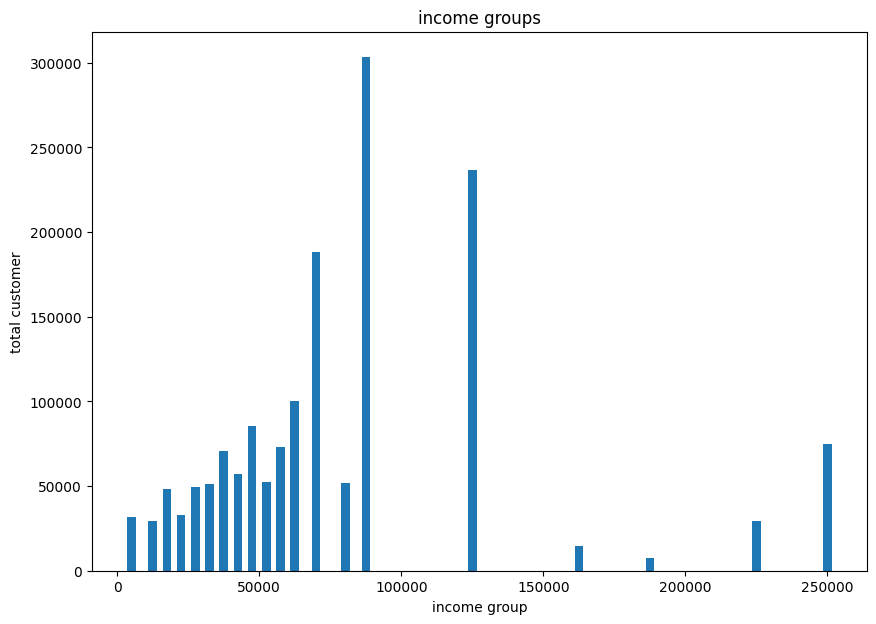

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
plt.bar(customer_analysis['income'], customer_analysis['total_customer'], width= 3000)

plt.xlabel('income group')
plt.ylabel('total customer')
plt.title('income groups')
plt.show()

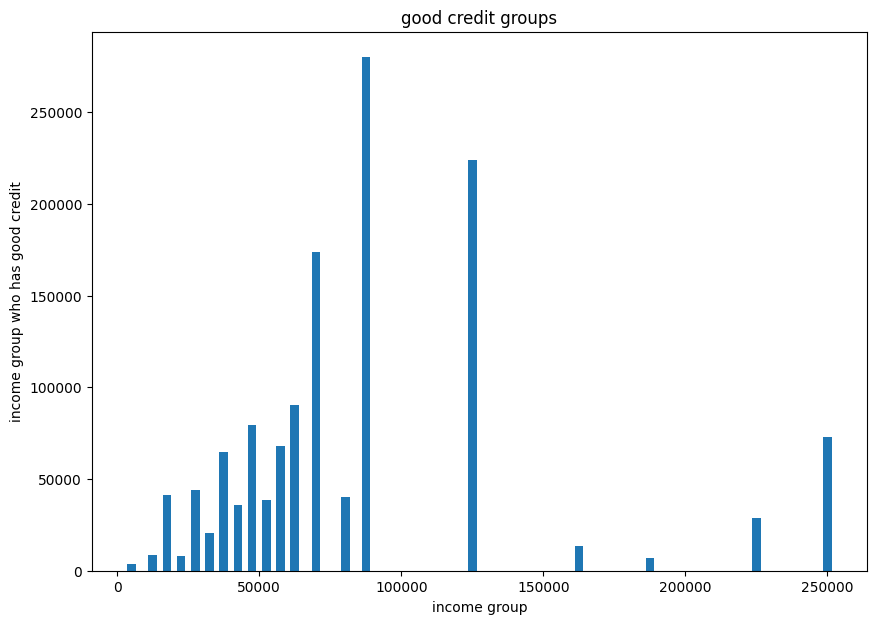

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
plt.bar(customer_analysis['income'], customer_analysis['good_credits'], width= 3000)

plt.xlabel('income group')
plt.ylabel('income group who has good credit')
plt.title('good credit groups')
plt.show()

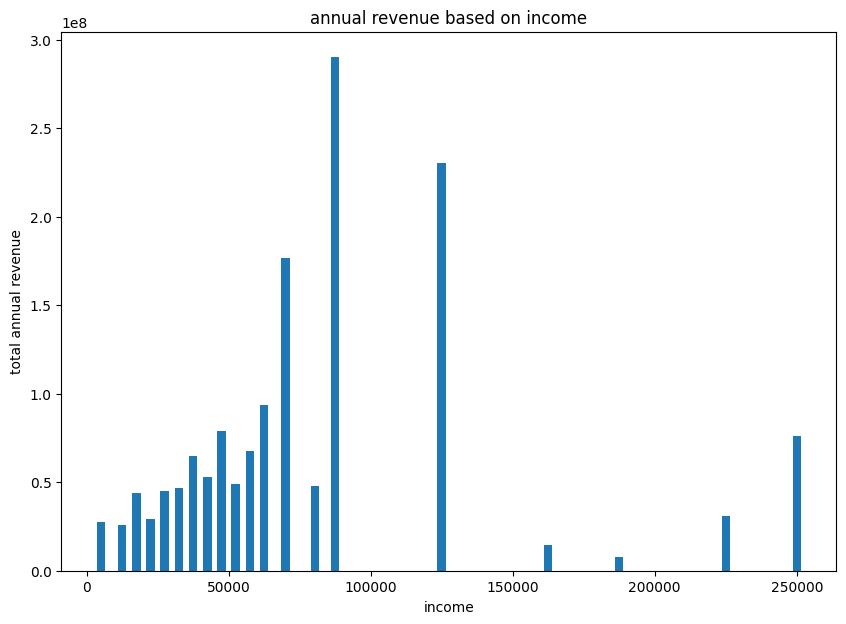

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
plt.bar(customer_analysis['income'], customer_analysis['annual_revenue'], width= 3000)

plt.xlabel('income')
plt.ylabel('total annual revenue')
plt.title('annual revenue based on income')
plt.show()

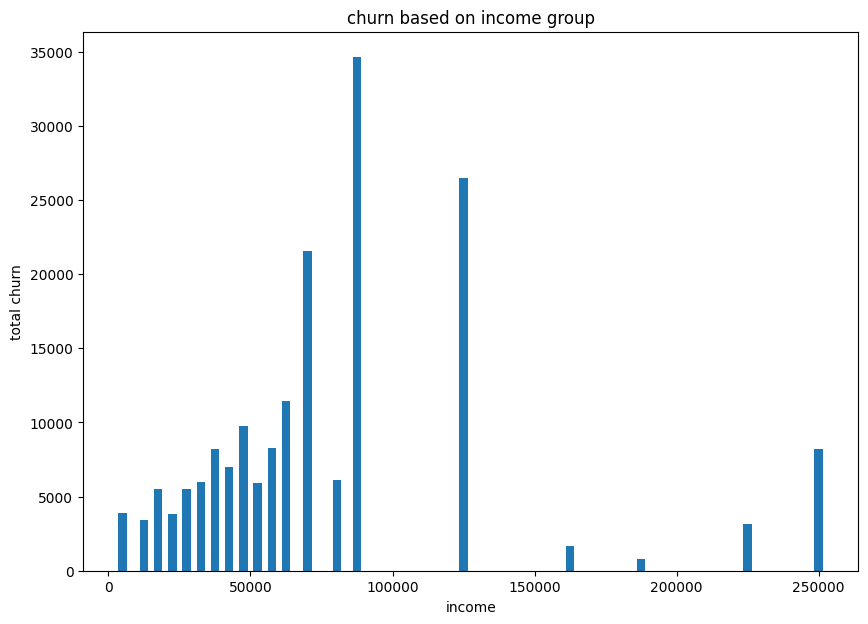

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
plt.bar(customer_analysis['income'], customer_analysis['Churn_total'], width= 3000)

plt.xlabel('income')
plt.ylabel('total churn')
plt.title('churn based on income group')
plt.show()

## Data Preprocessing

In [ ]:
df_fin['marital_status'] = df_fin['marital_status'].map({'Married': 1, 'Single' : 0})

In [ ]:
df_fin

,individual_id,curr_ann_amt,days_tenure,cust_orig_date,age_in_years,date_of_birth,income,has_children,length_of_residence,marital_status,home_owner,college_degree,good_credit,Churn,median_house_value
0,2.213000e+11,818.877997,1454.0,2018-12-09,44,1978-06-23,22500.0,1.0,15.0,1,1.0,1.0,1.0,0,62499.5
1,2.213001e+11,974.199182,1795.0,2018-01-02,72,1950-05-30,27500.0,0.0,2.0,0,1.0,0.0,0.0,0,62499.5
2,2.213007e+11,967.375112,4818.0,2009-09-23,55,1967-07-07,42500.0,0.0,10.0,1,1.0,0.0,0.0,0,87499.5
3,2.213016e+11,992.409561,130.0,2022-07-25,53,1969-05-25,125000.0,1.0,6.0,1,1.0,0.0,1.0,1,187499.5
4,2.213016e+11,784.633494,5896.0,2006-10-11,50,1972-09-25,87500.0,1.0,4.0,1,1.0,1.0,1.0,0,237499.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1680904,2.213007e+11,1259.900413,803.0,2020-09-20,55,1967-07-07,27500.0,1.0,3.0,0,1.0,0.0,1.0,0,62499.5
1680905,2.213015e+11,604.096865,3261.0,2013-12-28,77,1945-07-01,87500.0,0.0,1.0,1,1.0,0.0,1.0,0,137499.5
1680906,2.213026e+11,1255.570597,3403.0,2013-08-08,41,1981-09-22,125000.0,0.0,12.0,1,1.0,1.0,1.0,0,137499.5
1680907,2.213008e+11,1104.105051,1258.0,2019-06-23,52,1970-07-26,87500.0,1.0,11.0,0,1.0,1.0,1.0,0,87499.5


In [ ]:
df_fin = df_fin.drop(columns = ['individual_id', 'cust_orig_date', 'date_of_birth'])

In [ ]:
df_fin

,curr_ann_amt,days_tenure,age_in_years,income,has_children,length_of_residence,marital_status,home_owner,college_degree,good_credit,Churn,median_house_value
0,818.877997,1454.0,44,22500.0,1.0,15.0,1,1.0,1.0,1.0,0,62499.5
1,974.199182,1795.0,72,27500.0,0.0,2.0,0,1.0,0.0,0.0,0,62499.5
2,967.375112,4818.0,55,42500.0,0.0,10.0,1,1.0,0.0,0.0,0,87499.5
3,992.409561,130.0,53,125000.0,1.0,6.0,1,1.0,0.0,1.0,1,187499.5
4,784.633494,5896.0,50,87500.0,1.0,4.0,1,1.0,1.0,1.0,0,237499.5
...,...,...,...,...,...,...,...,...,...,...,...,...
1680904,1259.900413,803.0,55,27500.0,1.0,3.0,0,1.0,0.0,1.0,0,62499.5
1680905,604.096865,3261.0,77,87500.0,0.0,1.0,1,1.0,0.0,1.0,0,137499.5
1680906,1255.570597,3403.0,41,125000.0,0.0,12.0,1,1.0,1.0,1.0,0,137499.5
1680907,1104.105051,1258.0,52,87500.0,1.0,11.0,0,1.0,1.0,1.0,0,87499.5


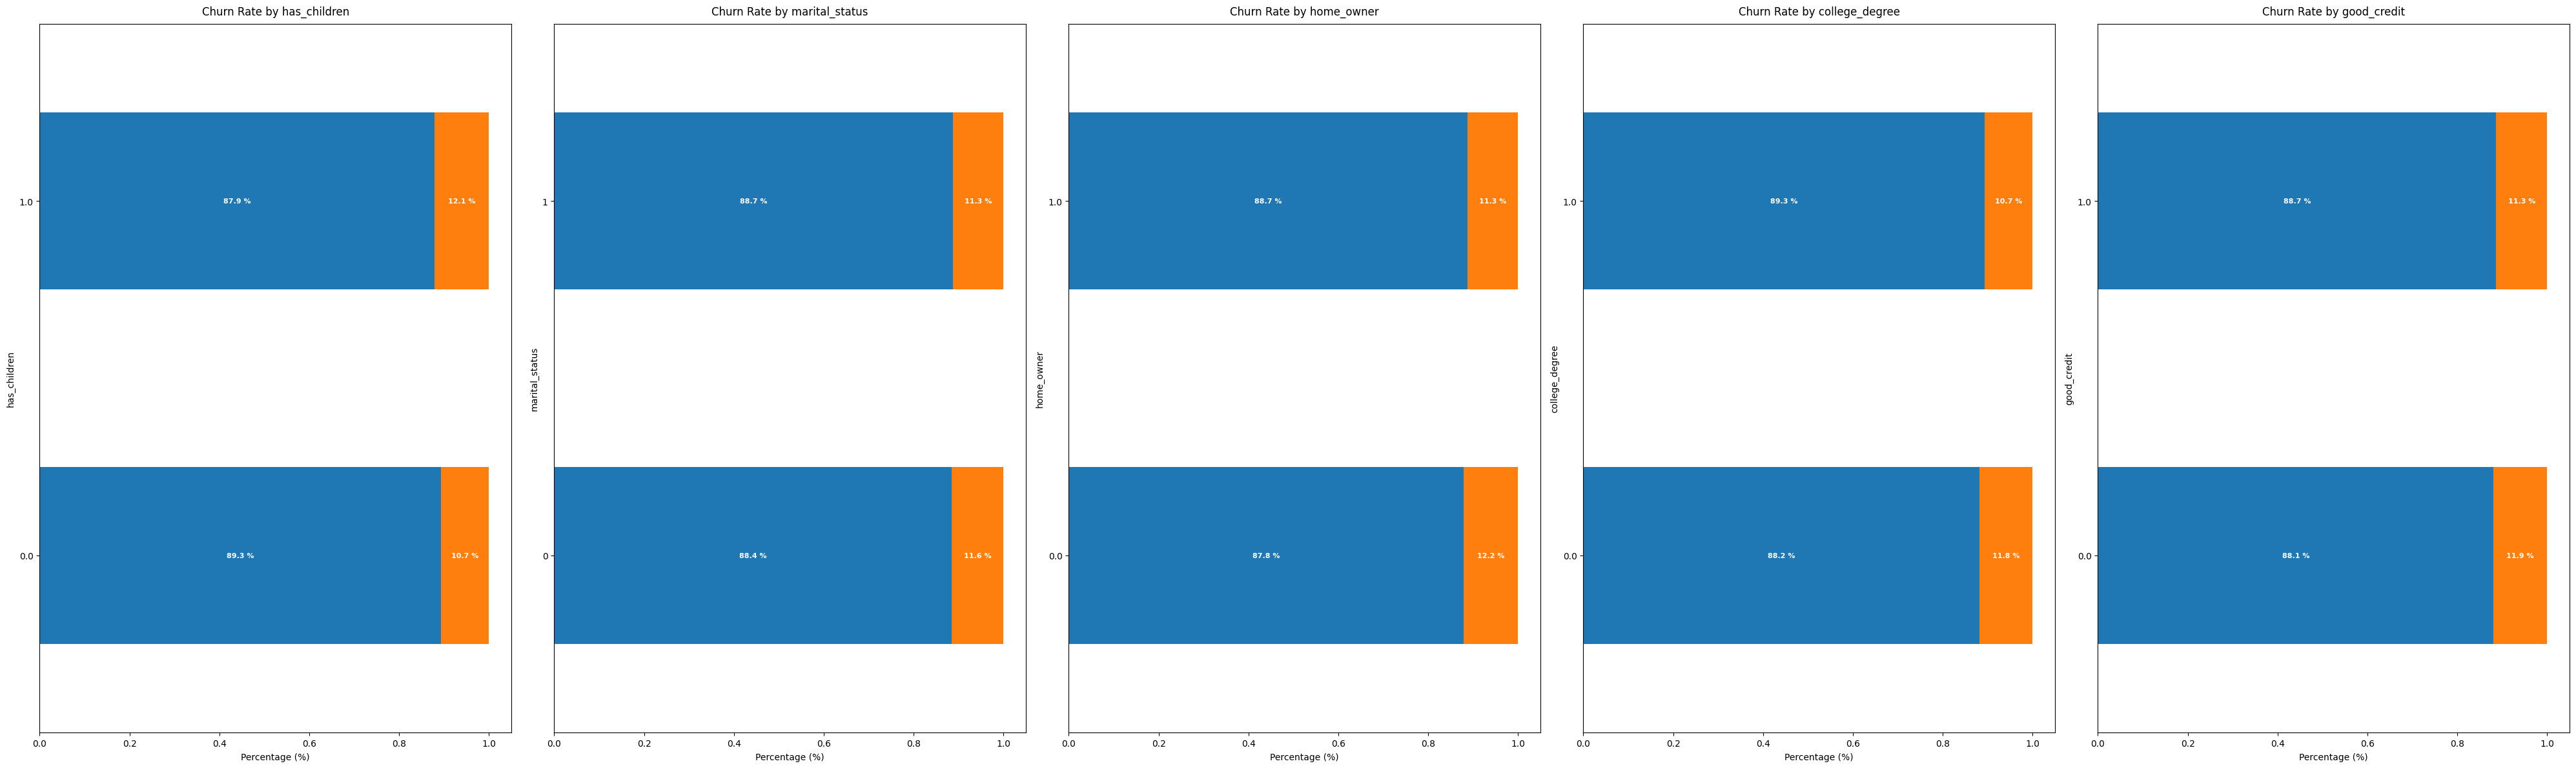

In [ ]:
columns_to_plot = ['has_children', 'marital_status', 'home_owner', 'college_degree', 'good_credit']

# Mendeklarasikan subplot dengan objek sumbu matplotlib
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(40, 12))

for i, column in enumerate(columns_to_plot):
    # Menghitung proporsi dan melakukan plotting
    ax = pd.crosstab(df_fin[column], df_fin['Churn'], normalize='index').plot.barh(stacked=True, ax=axes[i])
    ax.legend(bbox_to_anchor=(0.5, 0.5), title='Is Churn', fontsize=10, title_fontsize=10, labels=['No', 'Yes'], loc='lower left')
    ax.legend().remove()

    # Menambahkan label persentase
    j = 1
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.text(x+width/2, y+height/2, '{:.1f} %'.format(width*100),
                horizontalalignment='center', verticalalignment='center',
                color='white', fontsize=8, weight='bold')
        j += 1

    # Menambahkan judul dan label sumbu
    ax.set_title(f'Churn Rate by {column}', fontsize=12, pad=10)
    ax.set_xlabel('Percentage (%)', fontsize=10, labelpad=5)
    ax.set_ylabel(column, fontsize=10)

# Menyusun tata letak subplot
plt.tight_layout()
plt.show()


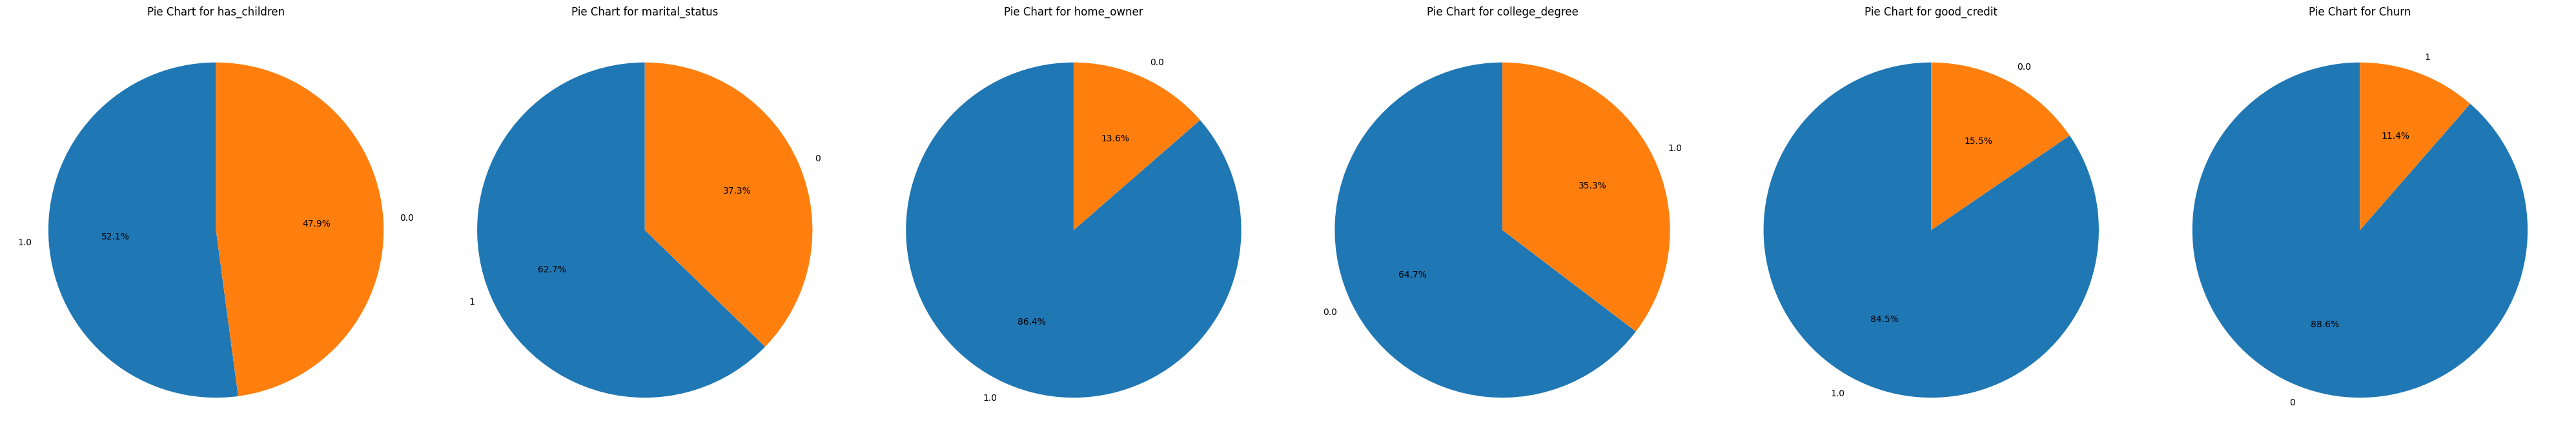

In [ ]:
data_plot = ['has_children', 'marital_status', 'home_owner', 'college_degree', 'good_credit', 'Churn']

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(40, 12))

axes = axes.flatten()

for i, column in enumerate(data_plot):
    labels = df_fin[column].value_counts().index
    axes[i].pie(df_fin[column].value_counts(), labels=labels, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'Pie Chart for {column}')

plt.tight_layout()
plt.show()

In [ ]:
cat = df_fin[['age_in_years', 'has_children', 'marital_status', 'home_owner', 'college_degree', 'good_credit', 'Churn']]

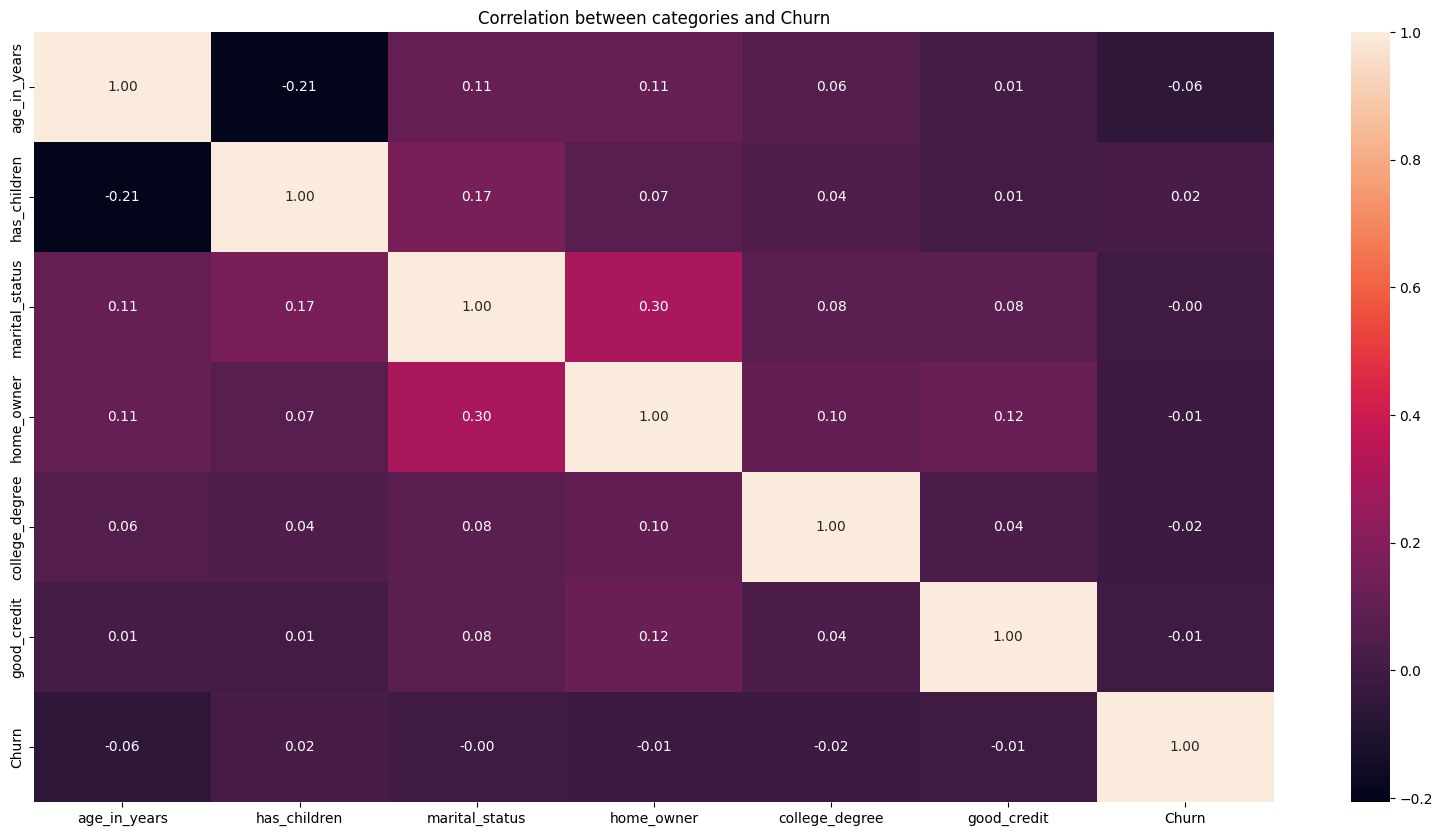

In [ ]:
corr = cat.corr()

plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.title('Correlation between categories and Churn')
plt.show() #double klik untuk melihat heatmap secara detail

In [ ]:
corr['Churn'].sort_values(ascending=False)

Churn             1.000000
has_children      0.021463
marital_status   -0.004291
good_credit      -0.006765
home_owner       -0.009390
college_degree   -0.017009
age_in_years     -0.055848
Name: Churn, dtype: float64

In [ ]:
numbers = df_fin[['curr_ann_amt', 'days_tenure', 'income', 'length_of_residence', 'median_house_value', 'Churn' ]]

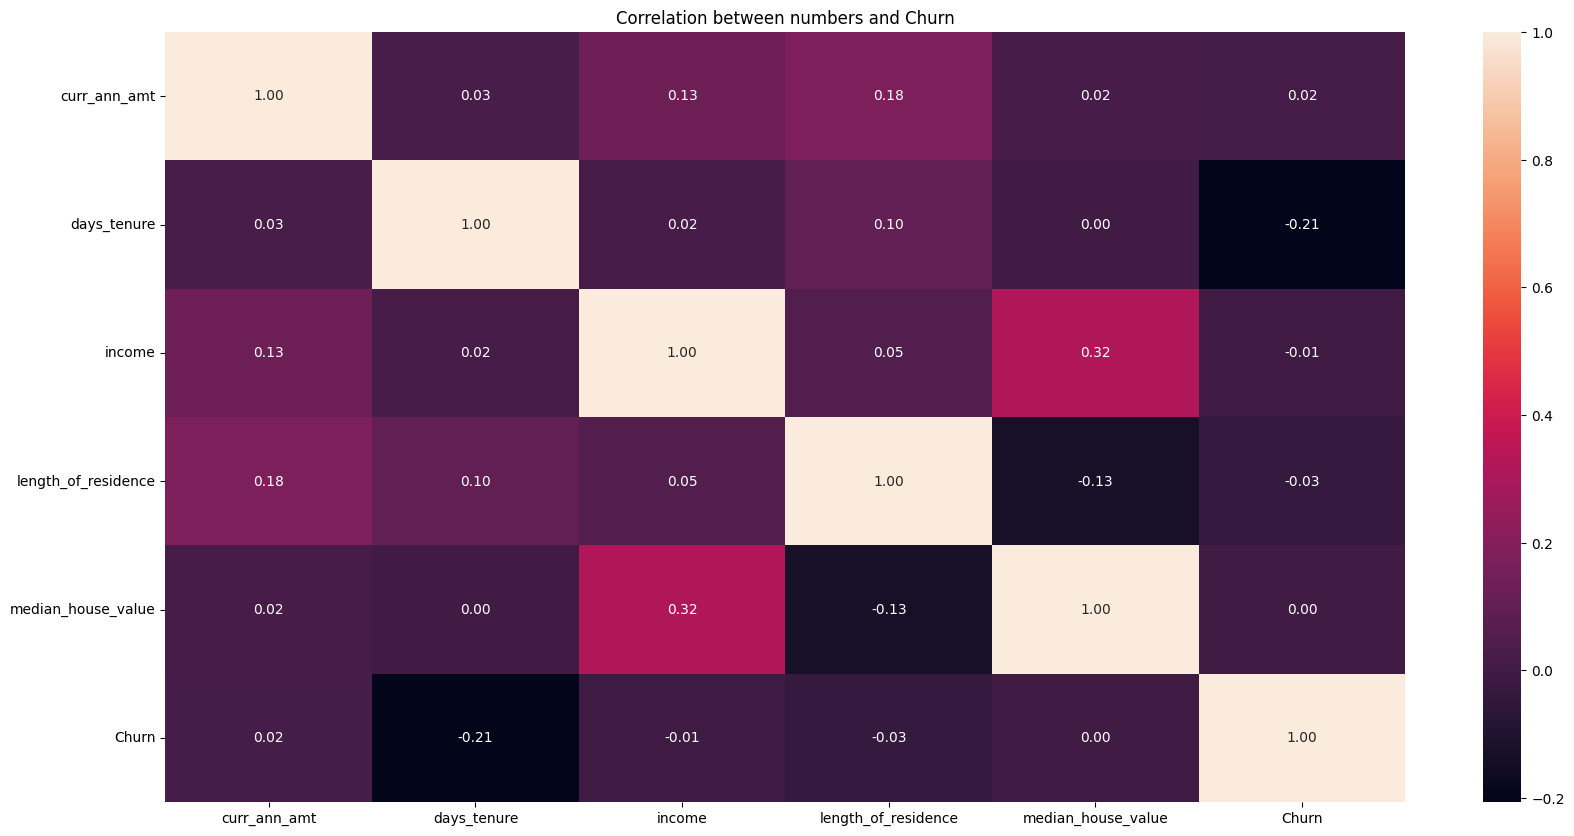

In [ ]:
corr_num = numbers.corr()

plt.figure(figsize=(20,10))
sns.heatmap(corr_num, annot=True, fmt='.2f')
plt.title('Correlation between numbers and Churn')
plt.show() #double klik untuk melihat heatmap secara detail

In [ ]:
corr_num['Churn'].sort_values(ascending=False)

Churn                  1.000000
curr_ann_amt           0.018434
median_house_value     0.000223
income                -0.005476
length_of_residence   -0.034402
days_tenure           -0.206253
Name: Churn, dtype: float64

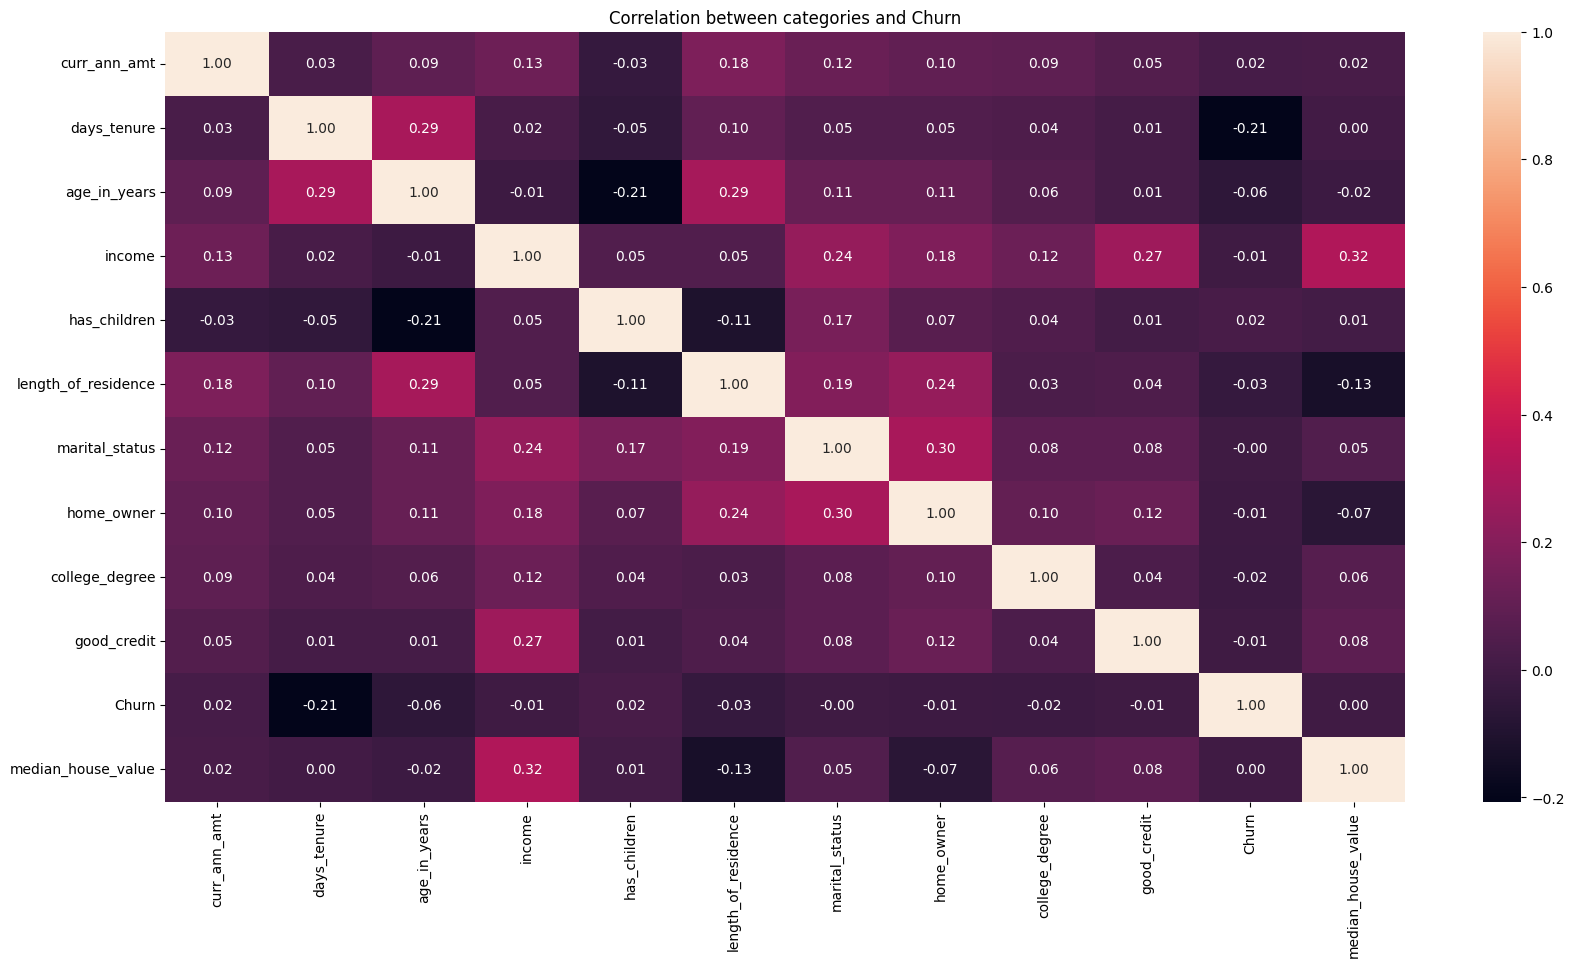

In [ ]:
corr_df = df_fin.corr()

plt.figure(figsize=(20,10))
sns.heatmap(corr_df, annot=True, fmt='.2f')
plt.title('Correlation between categories and Churn')
plt.show() #double klik untuk melihat heatmap secara detail

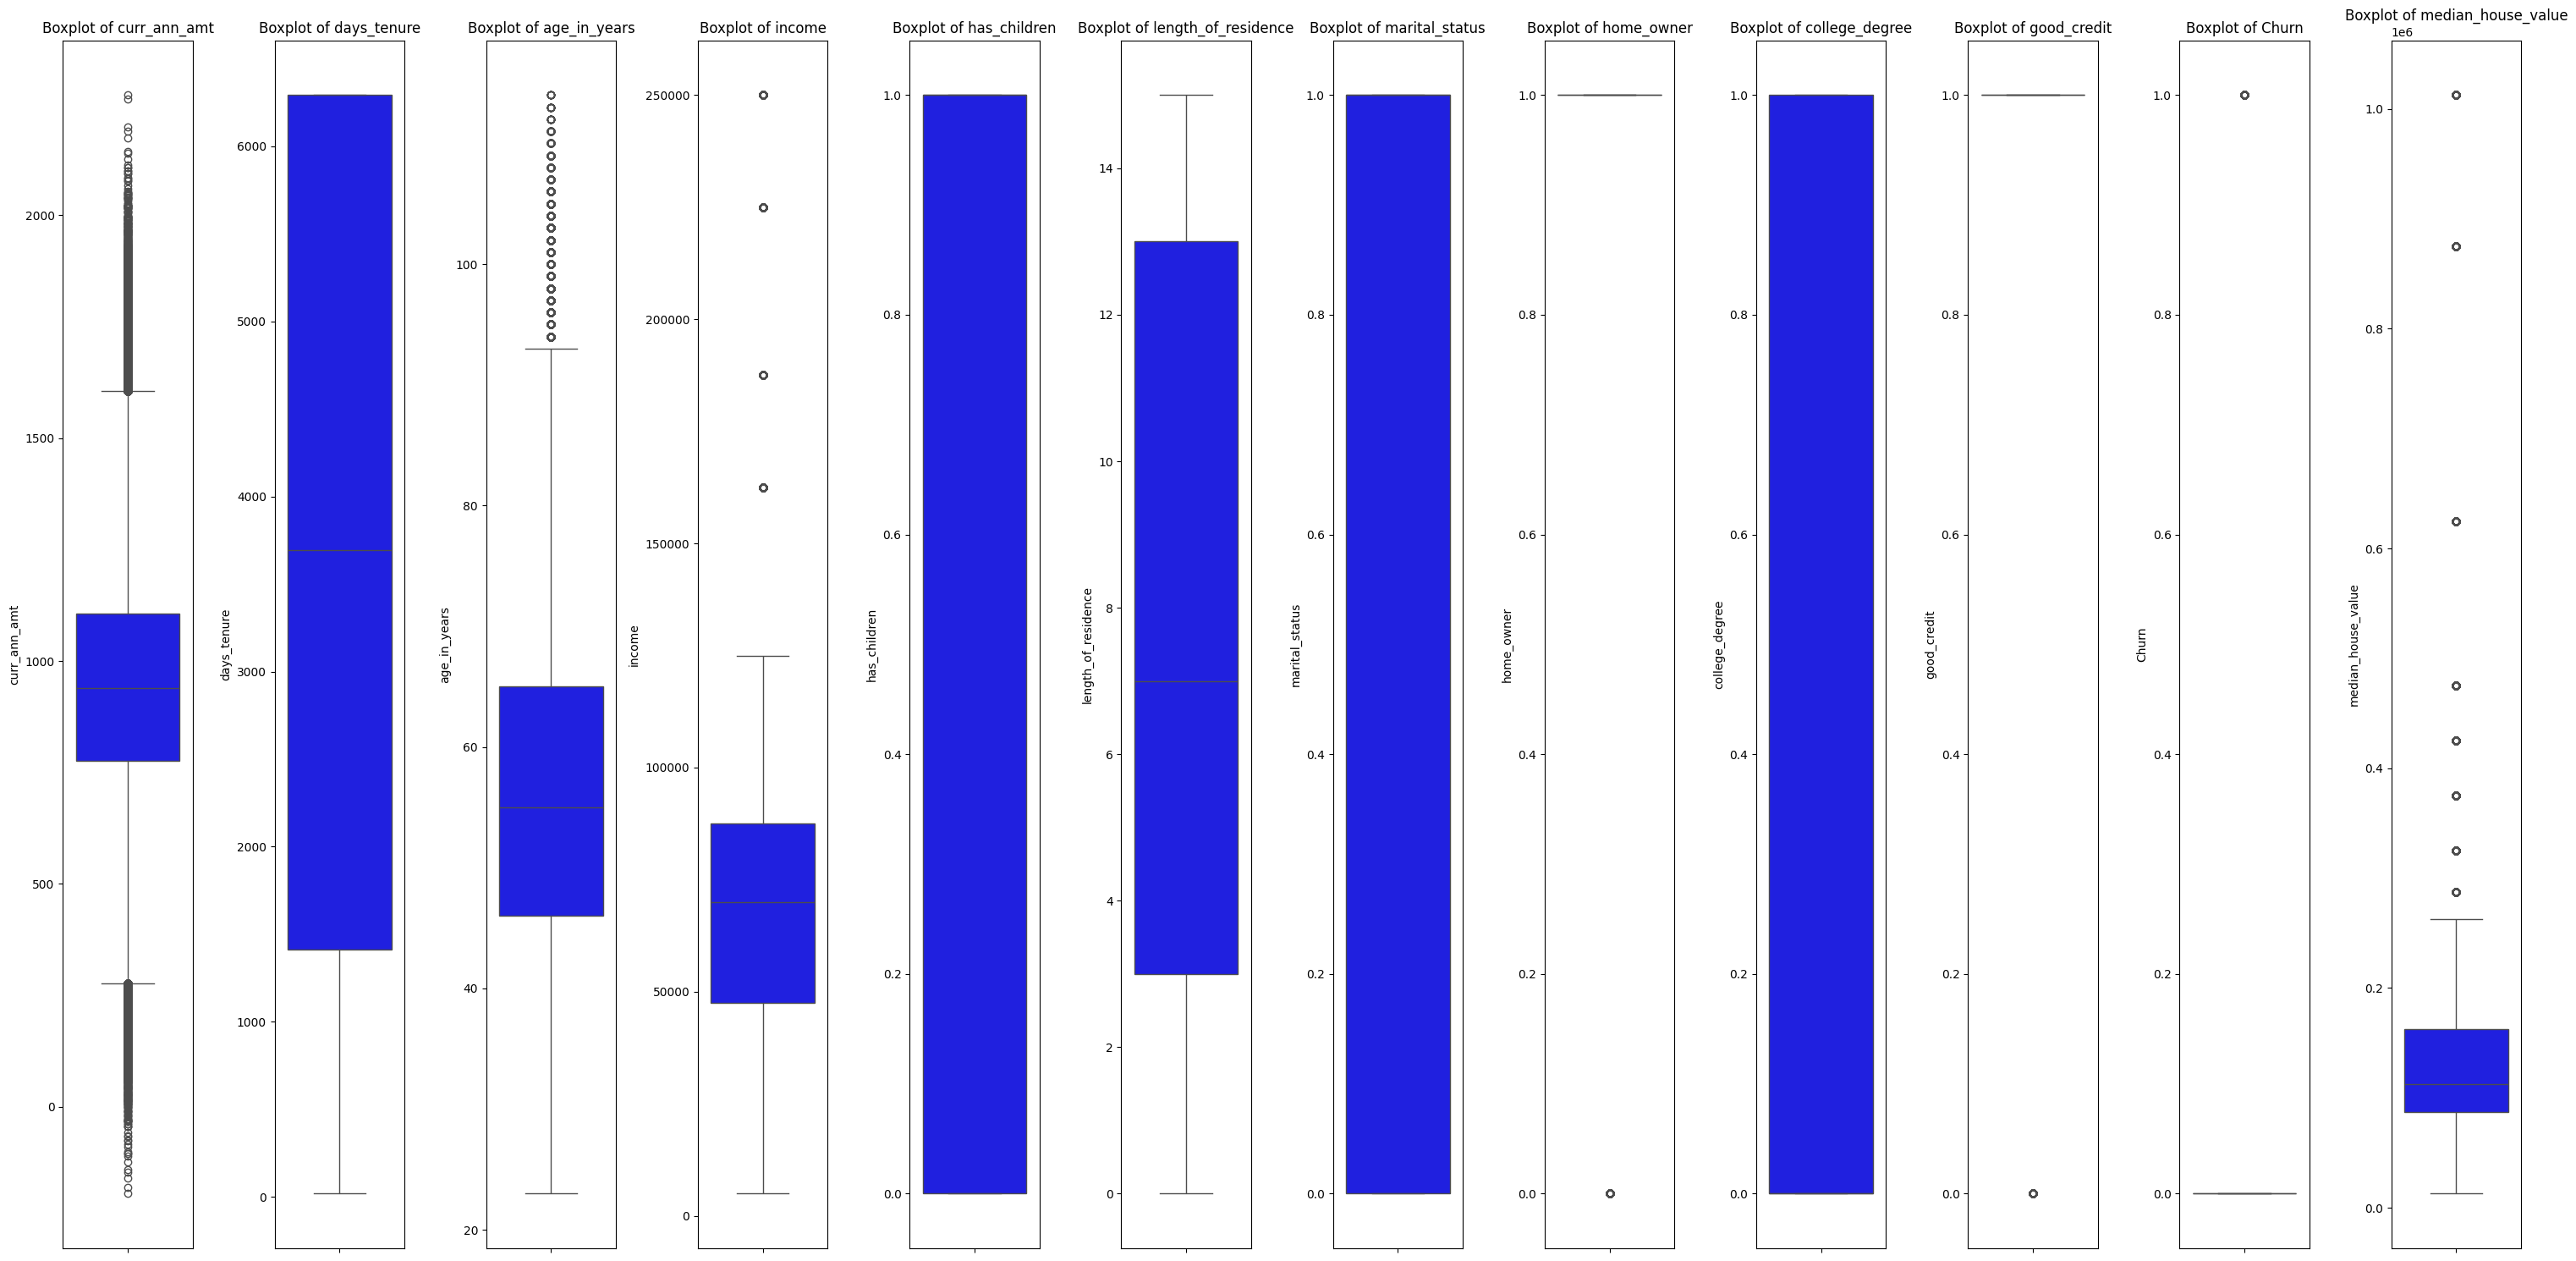

In [ ]:
plt.figure(figsize=(30, 15))

for i in range(len(df_fin.columns)):
    plt.subplot(1, len(df_fin.columns), i + 1)
    sns.boxplot(y=df_fin[df_fin.columns[i]], color='blue')

    plt.title(f'Boxplot of {df_fin.columns[i]}')
    plt.tight_layout()

plt.show()


In [ ]:
Q1 = df_fin['curr_ann_amt'].quantile(0.25)
Q3 = df_fin['curr_ann_amt'].quantile(0.75)
IQR = Q3 - Q1
batas_bawah = Q1 - 1.5*IQR
batas_atas = Q3 + 1.5*IQR

In [ ]:
Q1_inc = df_fin['income'].quantile(0.25)
Q3_inc = df_fin['income'].quantile(0.75)
IQR_inc = Q3_inc - Q1_inc
batas_bawah_inc = Q1_inc - 1.5*IQR_inc
batas_atas_inc = Q3_inc + 1.5*IQR_inc

In [ ]:
Q1_med = df_fin['median_house_value'].quantile(0.25)
Q3_med = df_fin['median_house_value'].quantile(0.75)
IQR_med = Q3_med - Q1_med
batas_bawah_med = Q1_med - 1.5*IQR_med
batas_atas_med = Q3_med + 1.5*IQR_med

In [ ]:
outliers_bawah = df_fin['curr_ann_amt'] < batas_bawah
outliers_atas = df_fin['curr_ann_amt'] > batas_atas

outliers = outliers_bawah | outliers_atas
df_fin[outliers]

,curr_ann_amt,days_tenure,age_in_years,income,has_children,length_of_residence,marital_status,home_owner,college_degree,good_credit,Churn,median_house_value
161,1680.879057,88.0,42,62500.000,1.0,9.0,1,1.0,1.0,1.0,0,62499.5
165,151.528826,69.0,37,80372.176,0.0,3.0,0,1.0,0.0,1.0,0,162499.5
296,271.386927,1759.0,71,87500.000,1.0,14.0,1,1.0,1.0,1.0,0,112499.5
567,1735.156591,6291.0,66,250000.000,0.0,15.0,1,1.0,1.0,1.0,0,237499.5
594,1628.806657,5415.0,43,42500.000,0.0,5.0,1,1.0,1.0,1.0,0,187499.5
...,...,...,...,...,...,...,...,...,...,...,...,...
1680661,229.718538,2409.0,55,125000.000,1.0,0.0,0,0.0,0.0,1.0,0,62499.5
1680663,1620.841516,6291.0,71,125000.000,0.0,4.0,0,0.0,0.0,1.0,0,187499.5
1680713,1653.972932,3212.0,55,32500.000,0.0,11.0,0,1.0,1.0,0.0,0,62499.5
1680800,231.729567,6291.0,80,87500.000,1.0,15.0,1,1.0,0.0,1.0,0,112499.5


In [ ]:
outliers_bawah_inc = df_fin['income'] < batas_bawah_inc
outliers_atas_inc = df_fin['income'] > batas_atas_inc

outliers_inc = outliers_bawah_inc | outliers_atas_inc
df_fin[outliers_inc]

,curr_ann_amt,days_tenure,age_in_years,income,has_children,length_of_residence,marital_status,home_owner,college_degree,good_credit,Churn,median_house_value
39,926.139865,6291.0,69,162500.0,0.0,0.0,1,1.0,1.0,1.0,0,187499.5
50,1001.512787,64.0,35,250000.0,0.0,15.0,0,1.0,0.0,1.0,0,137499.5
58,756.437020,165.0,63,250000.0,1.0,12.0,0,1.0,0.0,1.0,1,287499.5
66,1015.138116,4384.0,78,250000.0,1.0,15.0,1,1.0,0.0,1.0,1,187499.5
76,1187.581187,6261.0,52,225000.0,1.0,10.0,1,1.0,1.0,1.0,0,112499.5
...,...,...,...,...,...,...,...,...,...,...,...,...
1680793,1023.919621,166.0,63,250000.0,1.0,4.0,0,1.0,0.0,1.0,0,237499.5
1680838,1023.778546,6291.0,64,225000.0,1.0,15.0,1,1.0,0.0,1.0,0,112499.5
1680857,888.265090,6291.0,67,250000.0,0.0,15.0,1,1.0,1.0,1.0,0,137499.5
1680864,861.515490,1966.0,27,162500.0,1.0,15.0,0,1.0,0.0,1.0,0,262499.5


In [ ]:
outliers_bawah_med = df_fin['median_house_value'] < batas_bawah_med
outliers_atas_med = df_fin['median_house_value'] > batas_atas_med

outliers_med = outliers_bawah_med | outliers_atas_med
df_fin[outliers_med]

,curr_ann_amt,days_tenure,age_in_years,income,has_children,length_of_residence,marital_status,home_owner,college_degree,good_credit,Churn,median_house_value
58,756.437020,165.0,63,250000.0,1.0,12.0,0,1.0,0.0,1.0,1,287499.5
99,909.860348,952.0,35,87500.0,0.0,1.0,1,1.0,1.0,1.0,0,424999.5
104,746.920223,1833.0,68,250000.0,1.0,1.0,0,1.0,1.0,0.0,0,324999.5
111,1037.677250,1557.0,60,32500.0,0.0,12.0,1,1.0,1.0,1.0,0,1012499.5
159,736.466746,1212.0,40,187500.0,0.0,1.0,1,0.0,0.0,1.0,0,287499.5
...,...,...,...,...,...,...,...,...,...,...,...,...
1680790,658.375961,5034.0,34,27500.0,1.0,4.0,0,0.0,0.0,0.0,0,474999.5
1680804,963.802242,138.0,56,62500.0,0.0,7.0,0,0.0,1.0,1.0,0,287499.5
1680813,724.826747,6291.0,82,125000.0,1.0,14.0,0,1.0,0.0,1.0,0,374999.5
1680829,988.048014,6291.0,55,87500.0,1.0,3.0,0,0.0,0.0,1.0,0,374999.5


In [ ]:
outliers_combined = outliers| outliers_inc | outliers_med

df_fin = df_fin[~ outliers_combined]

In [ ]:
df_fin = df_fin.reset_index()

In [ ]:
df_fin

,index,curr_ann_amt,days_tenure,age_in_years,income,has_children,length_of_residence,marital_status,home_owner,college_degree,good_credit,Churn,median_house_value
0,0,818.877997,1454.0,44,22500.0,1.0,15.0,1,1.0,1.0,1.0,0,62499.5
1,1,974.199182,1795.0,72,27500.0,0.0,2.0,0,1.0,0.0,0.0,0,62499.5
2,2,967.375112,4818.0,55,42500.0,0.0,10.0,1,1.0,0.0,0.0,0,87499.5
3,3,992.409561,130.0,53,125000.0,1.0,6.0,1,1.0,0.0,1.0,1,187499.5
4,4,784.633494,5896.0,50,87500.0,1.0,4.0,1,1.0,1.0,1.0,0,237499.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1397606,1680903,960.699187,723.0,55,70000.0,1.0,4.0,0,1.0,0.0,1.0,0,112499.5
1397607,1680904,1259.900413,803.0,55,27500.0,1.0,3.0,0,1.0,0.0,1.0,0,62499.5
1397608,1680905,604.096865,3261.0,77,87500.0,0.0,1.0,1,1.0,0.0,1.0,0,137499.5
1397609,1680906,1255.570597,3403.0,41,125000.0,0.0,12.0,1,1.0,1.0,1.0,0,137499.5


In [ ]:
X = df_fin.drop(columns = ['Churn'])
y = df_fin[['Churn']]

In [ ]:
from sklearn.preprocessing import RobustScaler, StandardScaler

scaler = StandardScaler()
X_Rob = scaler.fit_transform(X)

In [ ]:
from imblearn import under_sampling, over_sampling


X_under,y_under = under_sampling.RandomUnderSampler().fit_resample(X_Rob,y)

In [ ]:
df_fin_under = pd.DataFrame(X_under, columns=X.columns)
df_fin_under['Churn'] = y_under

In [ ]:
X_ml = df_fin_under.drop(columns= 'Churn')
y_ml = df_fin_under[['Churn']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X_ml,
                                                y_ml,
                                                test_size = 0.25,
                                                random_state = 42)

In [ ]:
df_imbalance = pd.DataFrame(columns=['method', 'accuracy', 'auc_score','precision', 'recall', 'f1_score'])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

#Under_sampling models

Tree = DecisionTreeClassifier()
xg = xgb.XGBClassifier()
forest = RandomForestClassifier()
logreg = LogisticRegression()

models = [Tree,
         xg,
         forest,
         logreg]


for model in models:
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)

    method = str(type(model)).split('.')[-1][:-2]

    acc = accuracy_score(y_test, y_predict)
    clas = classification_report(y_test, y_predict, digits= 6)
    roc = roc_auc_score(y_test, y_predict)
    preci = precision_score(y_test, y_predict)
    rec = recall_score(y_test, y_predict)
    f1 = f1_score(y_test, y_predict)
    #print(f'{model} accuracy: {acc}, and auc score: {roc}')
    #print(clas)

    df_imbalance = df_imbalance.append({'method' : method,
                                'accuracy' : acc,
                                'auc_score' : roc,
                                'precision' : preci,
                                'recall' : rec,
                                'f1_score' : f1}, ignore_index=True)


df_imbalance

,method,accuracy,auc_score,precision,recall,f1_score
0,DecisionTreeClassifier,0.594802,0.594807,0.593453,0.598436,0.595934
1,XGBClassifier,0.692150,0.691833,0.852106,0.463972,0.600805
2,RandomForestClassifier,0.682163,0.681896,0.795276,0.489436,0.605952
3,LogisticRegression,0.627614,0.627646,0.621420,0.650467,0.635612


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

best_model = LogisticRegression()
param_dist = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': np.logspace(-3, 3, 7),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': np.arange(100, 1000, 100),
    'random_state': [42]
}

randomized_search = RandomizedSearchCV(
    best_model, param_dist, n_iter=10, cv=5, scoring='recall', random_state=42
)

randomized_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                                        'max_iter': array([100, 200, 300, 400, 500, 600, 700, 800, 900]),
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'random_state': [42],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=42, scoring='recall')

In [ ]:
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result = pd.DataFrame(randomized_search.cv_results_)
cv_result[retain_cols].sort_values(by='mean_test_score', ascending=False)

,params,mean_test_score,rank_test_score
9,"{'solver': 'liblinear', 'random_state': 42, 'p...",0.650931,1
3,"{'solver': 'newton-cg', 'random_state': 42, 'p...",0.649805,2
0,"{'solver': 'lbfgs', 'random_state': 42, 'penal...",0.649797,3
6,"{'solver': 'lbfgs', 'random_state': 42, 'penal...",0.649797,3
4,"{'solver': 'saga', 'random_state': 42, 'penalt...",0.649789,5
7,"{'solver': 'sag', 'random_state': 42, 'penalty...",0.649789,5
1,"{'solver': 'newton-cg', 'random_state': 42, 'p...",NaN,7
2,"{'solver': 'newton-cg', 'random_state': 42, 'p...",NaN,7
5,"{'solver': 'lbfgs', 'random_state': 42, 'penal...",NaN,7
8,"{'solver': 'newton-cg', 'random_state': 42, 'p...",NaN,7


In [ ]:
from sklearn.metrics import classification_report
y_pred = randomized_search.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.60      0.62     40010
           1       0.62      0.65      0.64     39899

    accuracy                           0.63     79909
   macro avg       0.63      0.63      0.63     79909
weighted avg       0.63      0.63      0.63     79909

